# Principal component analysis
Machine learning in general works wonders when the dataset provided for training the machine is large and concise. Usually having a good amount of data lets us build a better predictive model since we have more data to train the machine with. However, using a large dataset has its own pitfalls. The biggest pitfall is the curse of dimensionality. 

It turns out that in large dimenstional datasets, there might be lots of inconsistencies in the features or lots of redundant featurs in the dataset, which only will increase the computation time and make data processing and EDA more convoluted. 

To get rid of the curse of dimensionality, a process called dimensionality reduction was introduced. Dimensionality reduction techniques can be used to filter only in a limited number of significant features needed for training and this is where PCA comes in. 

## What is PCA?
Principal Components Analysis (PCA) is dimensionality reduction technique that enables you to identify correlations and patters in a data set so that it can be transofmred into a data set of significantly lower dimension without loss of any important information. 

## Step-by-Step Computation of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

- Standardization of the data
- Computing the covariance matrix
- Calculating the eigenvectors and eigenvalues
- Computing the Principal Components
- Reducing the dimensions of the data set

Here are all the steps in detail: 

### Step 1: Standardization of the data 
Standardization is all about scaling your data in such a way that all the variables and their values lie within a similar range. 

Consider an example, let's say that we have 2 variables in a our data set, one has values ranging between 0 - 100 and the other has values between 1,000 - 5,000. In such a scenario, it is obvious that the output calculated by using these predictor variables is going to be biased since the variable with a larger range will have a more obvious impact on the outcome. 

Therefore, standardizing the data into a comparable range is very important. Standardization is carried out by subtracting each value in the data from the mean and dividing it by the overall deviation in the data set. 

It can be calculated like so:

Z = (Variable value - mean)/Standard deviation
                
Post this step, all the variables in the data are scaled across a standard and comparable scale. 

### Step 2: Computing the covariance matrix
As mentioned earlier, PCA helps to identify the correlation and dependencies among the features in a data set. A covariance matrix expresses the correlation between the different variables in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. 

Mathematically, a covariance matrix is a p x p matrix, where p represents the dimensions of the data set. Each entry in the matrix represents the covariance of the corresponding variables. 

Consider a case where we have a 2D data set with variables a and b, the covariance matrix is a 2 x 2 matrix as show below

$$\begin{bmatrix}
Cov(a,a) & Cov(a,b) \\
Cov(b,a) & Cov(b,b) 
\end{bmatrix}$$

In the above matrix:
- Cov(a,a) represents the covariance of a variable with itself, which is nothing but the variance of the variable 'a'
- Cov(a,b) represents the covariance of the variable 'a' with respect to the variable 'b'. And since covariance is commutative, Cov(a,b) = Cov(b,a)

Here are the key takeaways from the covariance matrix:

- The covariance values denotes how co-dependent two variables are with respect to each other
- If the covariance value is negative, it denotes the respective variables are indirectly proportional to each other
- A positive covariance denotes that the respective variables are directly proportional to each other

### Step 3: Calculating the Eigenvectors and Eigenvalues
Eigenvectors and eigenvalues are the mathematical constructs that must be computed from the covariance matrix in order to deteremine the principal components of the data set. But first, let's understand more about principal components

### What are principal components?
Simply put, principal components are the new set of variables that are obtained from the initial set of variables. The principal components are computed in such a manner that newly oobtained variables are highly significant and independent of each other. The principal components compress and possess most of the useful information that was scattered among the initial variables. 

If your data set is of 5 dimensions, then 5 principal components are computed, such that, the first principal component stores the maximium possible information and the second one stores the remaining maximum info and so on, you get the idea. 

Now, where do Eigenvectors fall into this whole process?

Assuming that all have a basic understanding of Eigenvectors and eigenvalues, we know that these two algebraic forumaltions are always computed as a pair, i.e., for every eigenvector there is an eigenvalue. The dimensions in the data determine the number of eigenvectors that you need to calculate. 

Consider a 2-Dimensional data set, for which 2 eigenvectors (and their respective eigenvalues) are computed. The idea behind eigenvectors is to use the Covariance matrix to understnad where in the data there is the most amount of variance. Since more variance in the data denotes more information about the data, eigenvectors are used to identify and compute Principal Components. 

Eigenvalues, on the other hand, simply denote the scalars of the respective eigenvectors. Therefore, eigenvectors and eigenvalues will compute the Principal Components of the data set.

### Step 4: Computing the Principal Components
Once we have computed the Eigenvectors and eigenvalues, all we have to do is order them in the descending order, where the eigenvector with the highest eigenvalue is the most significant and thus forms the first principal component. The principal components of lesser significances can thus be removed in order to reduce the dimensions of the data. 

The final step in computing the Principal Components is to form a matrix known as the feature matrix that contains all the significant data variables that possess maximum information about the data. 

### Step 5: Reducing the dimensions of the data set
The last step in performing PCA is to re-arrange the original data with the final principal components which represent the maximum and the most significant information of the data set. In order to replace the original data axis with the newly formed Principal Components, you simply multiple the transpose of the original data set by the transpose of the obtained feature vector. 

So that was the theory behind the entire PCA process. It's time to get our hands dirty and perform all these steps by using a real data set. 

## Principal Component Analysis Using Python
In this section, we will be performing PCA by using Python.

#### Problem statement: 
To perform step-by-step Principal Component Analysis in order to reduce the dimension of the data set.

#### Data Set Description:
Movies rating data set that contains ratings from 700+ users for approximately 9,000 movies (features).

#### Logic:
Perform PCA. by finding the most significant features in teh data. PCA will be perfroemd by following the steps that were defined above

#### Step 1: Import required packages

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import *
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

#### Step 2: Import data set

In [12]:
#Load movie names and movie ratings
movies = pd.read_csv('~/Documents/GitHub/professional-development/PCA/movies.csv')
ratings = pd.read_csv('~/Documents/GitHub/professional-development/PCA/ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

In [13]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


#### Step 3: Formatting the data

In [16]:
def replace_name(x):
    return movies[movies['movieId'] == x].title.values[0]

In [17]:
ratings.movieId = ratings.movieId.map(replace_name)
M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
df1 = M.replace(np.nan, 0, regex=True)

#### Step 4: Standardization
In the below line of code, we use the StandardScalar() function provided by the sklearn package in order to scale the data set within the comparable ranges. As discussed earlier, standardization is required to prevent biases in the final outcome.

In [18]:
X_std = StandardScaler().fit_transform(df1)

In [31]:
df1

movieId,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


In [38]:
X_std

array([[-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
         5.84559005, -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       ...,
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [-0.04052204, -0.04052204, -0.05735393, ..., -0.08870074,
        -0.2019994 , -0.04052204],
       [24.67792536, -0.04052204, -0.05735393, ...,  8.02741663,
        -0.2019994 , -0.04052204]])

#### Step 5: Compute covariance matrix
As discussed earlier, a covariance matrix expresses the correlation between the different features in the data set. It is essential to identify heavily dependent variables because they contain biased and redundant information which reduces the overall performance of the model. The below code snippet computes the covariance matrix for the data:

In [19]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix n%s' %cov_mat)

Covariance matrix n[[ 1.00164204 -0.00164473 -0.00232791 ...  0.32582147 -0.00819887
  -0.00164473]
 [-0.00164473  1.00164204  0.70768614 ... -0.00360024 -0.00819887
  -0.00164473]
 [-0.00232791  0.70768614  1.00164204 ... -0.00509569 -0.01160448
  -0.00232791]
 ...
 [ 0.32582147 -0.00360024 -0.00509569 ...  1.00164204 -0.01794692
  -0.00360024]
 [-0.00819887 -0.00819887 -0.01160448 ... -0.01794692  1.00164204
  -0.00819887]
 [-0.00164473 -0.00164473 -0.00232791 ... -0.00360024 -0.00819887
   1.00164204]]


#### Step 6: Calculate eigenvectors and eigenvalues
In this step eigenvectors and eigenvalues are calculated which basically compute the Principal Components of the data set.

In [21]:
#Calculating eigenvectors and eigenvalues on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[-6.17879786e-03+0.00000000e+00j  7.13214703e-03+0.00000000e+00j
   3.60191232e-03+0.00000000e+00j ... -4.56597582e-07-4.68471093e-07j
   2.15905645e-07+0.00000000e+00j  2.93755504e-07+0.00000000e+00j]
 [-1.37389338e-04+0.00000000e+00j -6.19748724e-05+0.00000000e+00j
  -2.68242736e-06+0.00000000e+00j ...  2.81242024e-08+2.83909337e-08j
  -1.26343891e-08+0.00000000e+00j -1.77031100e-08+0.00000000e+00j]
 [ 3.98116838e-05+0.00000000e+00j -1.70073920e-04+0.00000000e+00j
  -3.54723573e-05+0.00000000e+00j ...  6.70897464e-09+7.73737868e-10j
   3.59240442e-09+0.00000000e+00j  1.20988370e-09+0.00000000e+00j]
 ...
 [-5.71402600e-03+0.00000000e+00j  4.61929109e-03+0.00000000e+00j
   3.30601109e-03+0.00000000e+00j ...  1.21577383e-06+1.61761876e-06j
  -8.53752944e-07+0.00000000e+00j -1.05837715e-06+0.00000000e+00j]
 [-1.45210348e-02+0.00000000e+00j -3.31390410e-04+0.00000000e+00j
   3.25182697e-03+0.00000000e+00j ...  3.59839441e-07-3.12781719e-07j
   2.51562416e-07+0.00000000e+00j

In [30]:
print(X_std.T)

[[-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  24.67792536]
 [-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  -0.04052204]
 [-0.05735393 -0.05735393 -0.05735393 ... -0.05735393 -0.05735393
  -0.05735393]
 ...
 [-0.08870074 -0.08870074 -0.08870074 ... -0.08870074 -0.08870074
   8.02741663]
 [ 5.84559005 -0.2019994  -0.2019994  ... -0.2019994  -0.2019994
  -0.2019994 ]
 [-0.04052204 -0.04052204 -0.04052204 ... -0.04052204 -0.04052204
  -0.04052204]]


#### Step 7: Compute the feature vector 
In this step, we rearrange the eigenvalues in descending order. This represents the significance of the principal components in descending order:

In [23]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
694.6347372544976
487.2206886294059
438.9889489555737
379.04045272530203
324.3162458652458
259.10919628862854
251.67075199496287
226.08065316490553
206.77043202389675
186.08012008011968
180.35681567362863
150.5768982687861
140.53351042556633
135.00425543775745
116.75931121355582
111.22844429826364
105.9858855639997
101.5206110886344
92.38143975955799
87.201464483169
83.94704525828463
76.51329078142042
73.12943769509796
71.33450019035197
68.66916875072967
68.11563805135067
66.09778445224114
64.79772886519687
64.76738664207974
60.57541016802261
60.09570157695375
58.444062203130656
57.143880762362805
55.703697008515405
55.15327698764716
54.42361668166475
53.62311697140742
49.754253302721224
49.22568958301034
47.79220889336291
46.743581142451
46.44527988080514
45.33955134746961
45.0999476209656
44.61986596644101
44.25650246763807
43.96138776159133
42.67209649629769
41.738887045201885
41.05033324888532
41.22691039968735
40.021144104127075
39.198143822752925


1.4054881965175762e-13
1.3743667797607282e-13
1.3743667797607282e-13
1.357276367134531e-13
1.357276367134531e-13
1.4293692406874413e-13
1.4293692406874413e-13
1.4239573401877648e-13
1.4239573401877648e-13
1.3406897853749046e-13
1.4003928929694287e-13
1.4003928929694287e-13
1.3244956639891476e-13
1.3244956639891476e-13
1.307485604928786e-13
1.307485604928786e-13
1.310121246635789e-13
1.3892695093872406e-13
1.3619689974616828e-13
1.3619689974616828e-13
1.363585416928776e-13
1.293926653448499e-13
1.345214195233818e-13
1.3276628130563097e-13
1.3276628130563097e-13
1.3094411475553253e-13
1.2986618594072885e-13
1.285391328591179e-13
1.285391328591179e-13
1.257293027945911e-13
1.257293027945911e-13
1.2614241969400767e-13
1.2614241969400767e-13
1.248894546353755e-13
1.248894546353755e-13
1.2020120982786217e-13
1.2020120982786217e-13
1.226911363160132e-13
1.226911363160132e-13
1.2233107445068082e-13
1.2166759836672535e-13
1.2003247192513397e-13
1.2003247192513397e-13
1.2568125285865066e-13
1.25

4.1670415907336865e-14
4.115098356988377e-14
4.115098356988377e-14
4.0899762581602015e-14
4.0899762581602015e-14
4.083194979289996e-14
4.07082077005086e-14
2.897136617515424e-14
2.897136617515424e-14
2.99822957626164e-14
2.99822957626164e-14
2.915594107987443e-14
2.915594107987443e-14
2.4882057958396576e-14
2.4882057958396576e-14
2.581079539319369e-14
2.581079539319369e-14
2.5568477430645837e-14
2.5568477430645837e-14
2.381272962650008e-14
2.381272962650008e-14
3.42372661497098e-14
3.42372661497098e-14
3.12353752051515e-14
3.12353752051515e-14
3.165688595375211e-14
3.165688595375211e-14
3.1057618347105256e-14
3.1057618347105256e-14
2.558342065367419e-14
2.558342065367419e-14
2.653587422384016e-14
2.653587422384016e-14
2.7867593188690357e-14
2.7867593188690357e-14
3.489444538619031e-14
3.489444538619031e-14
2.876056522018914e-14
2.876056522018914e-14
3.324188724799405e-14
3.324188724799405e-14
2.990105166045994e-14
2.990105166045994e-14
3.090108909548205e-14
3.090108909548205e-14
3.5858

1.7654851593253216e-14
1.86790994887129e-14
1.86790994887129e-14
1.883716629321597e-14
1.883716629321597e-14
1.883072566996234e-14
1.883072566996234e-14
1.8211580066042244e-14
1.8211580066042244e-14
1.8031565561171536e-14
1.8031565561171536e-14
1.8741962000444082e-14
1.8741962000444082e-14
1.9164523276874114e-14
1.9164523276874114e-14
1.8661478246662797e-14
1.8661478246662797e-14
1.821645440257305e-14
1.821645440257305e-14
1.868770460702147e-14
1.868770460702147e-14
1.9118191631282988e-14
1.9118191631282988e-14
1.9189107725323317e-14
1.9189107725323317e-14
1.8597603087686162e-14
1.8597603087686162e-14
1.8988841970499575e-14
1.8988841970499575e-14
1.870092583103941e-14
1.870092583103941e-14
1.8989190165730135e-14
1.8989190165730135e-14
1.8434960998672397e-14
1.8434960998672397e-14
1.861970048209503e-14
1.861970048209503e-14
1.9111919190080275e-14
1.9111919190080275e-14
1.931411125419468e-14
1.931411125419468e-14
1.8412890987708134e-14
1.8412890987708134e-14
1.8814188533692752e-14
1.8814

3.35130409111336e-15
3.0967509740229614e-15
3.0967509740229614e-15
3.2487752352541946e-15
3.2487752352541946e-15
3.2111932749818044e-15
3.2111932749818044e-15
3.719641777845013e-15
3.719641777845013e-15
4.9071317879145825e-15
4.9071317879145825e-15
4.9566483532101165e-15
4.9566483532101165e-15
4.426336402148038e-15
4.426336402148038e-15
7.550582532832608e-15
3.951960108732181e-15
3.951960108732181e-15
5.750964582035372e-15
5.750964582035372e-15
7.333116835992513e-15
7.333116835992513e-15
4.499780801986016e-15
4.499780801986016e-15
4.81338261243659e-15
4.81338261243659e-15
6.0507065761993446e-15
6.0507065761993446e-15
7.133846899904405e-15
7.133846899904405e-15
6.763467062431516e-15
6.763467062431516e-15
7.366854491071044e-15
7.366854491071044e-15
6.075497369325834e-15
6.075497369325834e-15
7.253606325723504e-15
5.917708450926096e-15
5.917708450926096e-15
4.1889126066648886e-15
4.1889126066648886e-15
4.7705056854169795e-15
4.7705056854169795e-15
5.049418276747528e-15
5.049418276747528e-

2.4645894566026105e-16
2.4645894566026105e-16
2.3509746692826465e-16
2.3509746692826465e-16
2.294279363499346e-16
2.294279363499346e-16
2.1898803266622088e-16
2.1898803266622088e-16
2.1413325018691428e-16
2.1413325018691428e-16
2.0301808504240938e-16
2.0301808504240938e-16
2.0031943230244275e-16
2.0031943230244275e-16
1.9675203719765096e-16
1.9675203719765096e-16
1.9333754211563472e-16
1.9333754211563472e-16
1.873135667897595e-16
1.873135667897595e-16
1.6967195847128277e-16
1.6967195847128277e-16
1.7037624406718365e-16
1.7037624406718365e-16
1.6900530117420163e-16
1.6900530117420163e-16
1.552442828176444e-16
1.552442828176444e-16
1.512100460748752e-16
1.429573871393902e-16
1.429573871393902e-16
1.4252973803282224e-16
1.4252973803282224e-16
1.324183164837782e-16
1.259017835217868e-16
1.259017835217868e-16
1.162555739654719e-16
1.162555739654719e-16
1.1319464866604417e-16
9.511203966595331e-17
9.511203966595331e-17
7.123415781323272e-17
8.265474737236147e-17
6.337213347750538e-17
6.33721

5.750468323527858e-31
5.750468323527858e-31
5.836360764380853e-31
5.836360764380853e-31
5.60772639056886e-31
5.60772639056886e-31
5.65854270117252e-31
5.65854270117252e-31
5.430494496723655e-31
5.430494496723655e-31
5.324510920330035e-31
5.324510920330035e-31
5.043924506868873e-31
5.043924506868873e-31
5.131582268025355e-31
5.131582268025355e-31
5.092913570148337e-31
5.092913570148337e-31
4.8871693789481476e-31
4.8871693789481476e-31
4.6895379690283565e-31
4.6895379690283565e-31
4.575470202126654e-31
4.575470202126654e-31
4.3269121571017295e-31
4.3269121571017295e-31
4.072287963274585e-31
4.089746397677735e-31
4.089746397677735e-31
3.830438174881571e-31
3.830438174881571e-31
3.9161479409499234e-31
3.9161479409499234e-31
3.924769986187484e-31
3.924769986187484e-31
3.673390721875064e-31
3.673390721875064e-31
3.5937396434705193e-31
3.5937396434705193e-31
3.6263830382551634e-31
3.6263830382551634e-31
3.546727657590179e-31
3.546727657590179e-31
3.2837871370081062e-31
3.2837871370081062e-31


#### Step 8: Use the PCA() function to reduce the dimensionality of the data set
The below code snippet uses the pre-defined PCA() function provided by the sklearn package in order to transform the data. The n_components parameter denotes the number of Principal Components you want to fit your data with:

In [27]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print(pca.explained_variance_ratio_)

[0.13502694 0.04383615]


The output shows that PC1 and PC2 account for approximately 14% of the variance in the data set.

#### Step 9: Projecting the variance w.r.t the Principle Components
To gain insights on the variance of the data with respect to a varied number of principal components let’s graph a scree plot. In statistics, a scree plot expresses the variance associated with each principal component:

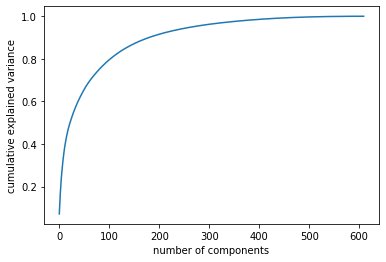

In [29]:
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

The scree plot clearly indicates that the first 500 principal components contain the maximum information (variance) within the data. Note that the initial data set had approximately 9000 features which can now be narrowed down to just 500. Thus, you can now easily perform further analysis on the data since the redundant or insignificant variables are out. This is the power of dimensionality reduction.

In [42]:
# original_num_df the original numeric dataframe
# pca is the model
def create_importance_dataframe(pca, original_num_df):

    # Change pcs components ndarray to a dataframe
    importance_df  = pd.DataFrame(pca.components_)

    # Assign columns
    importance_df.columns  = original_num_df.columns

    # Change to absolute values
    importance_df =importance_df.apply(np.abs)

    # Transpose
    importance_df=importance_df.transpose()

    # Change column names again

    ## First get number of pcs
    num_pcs = importance_df.shape[1]

    ## Generate the new column names
    new_columns = [f'PC{i}' for i in range(1, num_pcs + 1)]

    ## Now rename
    importance_df.columns  =new_columns

    # Return importance df
    return importance_df

In [50]:
pca = sklearnPCA(n_components=220)
pca.fit_transform(df1)

# Call function to create importance df
importance_df  = create_importance_dataframe(pca, df1)

# Show first few rows
display(importance_df.head())

# Sort depending on PC of interest

## PC1 top 10 important features
pc1_top_10_features = importance_df['PC1'].sort_values(ascending = False)[:10]
print(), print(f'PC1 top 10 features are \n')
display(pc1_top_10_features )

## PC2 top 10 important features
pc2_top_10_features = importance_df['PC2'].sort_values(ascending = False)[:10]
print(), print(f'PC2 top 10 features are \n')
display(pc2_top_10_features )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC211,PC212,PC213,PC214,PC215,PC216,PC217,PC218,PC219,PC220
movieId,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.001603,0.003215,0.001204,0.001673,0.006684,0.004361,0.001214,0.005930,0.007992,0.002449,...,0.000189,0.000322,0.000973,0.001661,0.000036,0.000821,0.000275,0.000355,0.000272,0.000150
'Hellboy': The Seeds of Creation (2004),0.000393,0.000242,0.000984,0.001327,0.001324,0.000950,0.000002,0.000556,0.000562,0.000260,...,0.003136,0.003480,0.000927,0.003013,0.000180,0.002093,0.002509,0.001402,0.003518,0.001980
'Round Midnight (1986),0.000201,0.000043,0.001209,0.001017,0.000460,0.000236,0.000226,0.000192,0.001046,0.000043,...,0.004632,0.000277,0.002766,0.007106,0.000847,0.005269,0.001754,0.006131,0.004109,0.003474
'Salem's Lot (2004),0.000300,0.000163,0.000513,0.000432,0.000782,0.000921,0.000343,0.000382,0.000526,0.000175,...,0.001881,0.000744,0.013682,0.011648,0.000261,0.002866,0.005347,0.005614,0.008636,0.006632
'Til There Was You (1997),0.000399,0.000564,0.001113,0.001127,0.001060,0.001008,0.000228,0.000662,0.000186,0.000624,...,0.002654,0.005046,0.011724,0.006096,0.006539,0.007701,0.003184,0.004661,0.006873,0.009210



PC1 top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.073747
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.068983
Star Wars: Episode IV - A New Hope (1977)                                         0.066471
Matrix, The (1999)                                                                0.065993
Fight Club (1999)                                                                 0.065047
Monty Python and the Holy Grail (1975)                                            0.064780
Back to the Future (1985)                                                         0.064016
Groundhog Day (1993)                                                              0.063803
Reservoir Dogs (1992)                                                             0.063461
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063109
Name: PC1, dtype: float64


PC2 top 10 features are 



movieId
Inception (2010)                                         0.102564
Dark Knight, The (2008)                                  0.100088
Up (2009)                                                0.080602
Lord of the Rings: The Return of the King, The (2003)    0.076778
Iron Man (2008)                                          0.073136
WALL·E (2008)                                            0.072152
Avatar (2009)                                            0.069865
Inglourious Basterds (2009)                              0.069803
Lord of the Rings: The Two Towers, The (2002)            0.069361
Dark Knight Rises, The (2012)                            0.068383
Name: PC2, dtype: float64

In [51]:
for column in importance_df:
   columnSeriesObj = importance_df[column]
   pc_top_10_features = columnSeriesObj.sort_values(ascending = False)[:10]
   print(), print(column + ' Top 10 features are \n')
   display(pc_top_10_features )


PC1 Top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.073747
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.068983
Star Wars: Episode IV - A New Hope (1977)                                         0.066471
Matrix, The (1999)                                                                0.065993
Fight Club (1999)                                                                 0.065047
Monty Python and the Holy Grail (1975)                                            0.064780
Back to the Future (1985)                                                         0.064016
Groundhog Day (1993)                                                              0.063803
Reservoir Dogs (1992)                                                             0.063461
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063109
Name: PC1, dtype: float64


PC2 Top 10 features are 



movieId
Inception (2010)                                         0.102564
Dark Knight, The (2008)                                  0.100088
Up (2009)                                                0.080602
Lord of the Rings: The Return of the King, The (2003)    0.076778
Iron Man (2008)                                          0.073136
WALL·E (2008)                                            0.072152
Avatar (2009)                                            0.069865
Inglourious Basterds (2009)                              0.069803
Lord of the Rings: The Two Towers, The (2002)            0.069361
Dark Knight Rises, The (2012)                            0.068383
Name: PC2, dtype: float64


PC3 Top 10 features are 



movieId
Aladdin (1992)                       0.127149
True Lies (1994)                     0.123657
Lion King, The (1994)                0.123202
Die Hard: With a Vengeance (1995)    0.122702
Fugitive, The (1993)                 0.112649
Jurassic Park (1993)                 0.111272
Apollo 13 (1995)                     0.107649
Speed (1994)                         0.104384
Beauty and the Beast (1991)          0.101210
Batman (1989)                        0.098976
Name: PC3, dtype: float64


PC4 Top 10 features are 



movieId
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.118015
Matrix, The (1999)                                                                0.113221
Star Wars: Episode IV - A New Hope (1977)                                         0.110719
Saving Private Ryan (1998)                                                        0.105922
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.099337
Aliens (1986)                                                                     0.098774
Terminator 2: Judgment Day (1991)                                                 0.097383
Terminator, The (1984)                                                            0.095333
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.091275
Alien (1979)                                                                      0.090686
Name: PC4, dtype: float64


PC5 Top 10 features are 



movieId
Shrek (2001)                                                 0.113495
Finding Nemo (2003)                                          0.092570
Lord of the Rings: The Return of the King, The (2003)        0.089905
Beautiful Mind, A (2001)                                     0.089578
Lord of the Rings: The Two Towers, The (2002)                0.083581
Shawshank Redemption, The (1994)                             0.083009
Fight Club (1999)                                            0.082657
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.082300
Eternal Sunshine of the Spotless Mind (2004)                 0.081933
Forrest Gump (1994)                                          0.079656
Name: PC5, dtype: float64


PC6 Top 10 features are 



movieId
Pulp Fiction (1994)                 0.173916
Shawshank Redemption, The (1994)    0.149890
Braveheart (1995)                   0.128139
Seven (a.k.a. Se7en) (1995)         0.126163
Silence of the Lambs, The (1991)    0.126133
Usual Suspects, The (1995)          0.112955
Dances with Wolves (1990)           0.109081
Fugitive, The (1993)                0.105214
Schindler's List (1993)             0.099673
Firm, The (1993)                    0.098425
Name: PC6, dtype: float64


PC7 Top 10 features are 



movieId
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.088725
Forrest Gump (1994)                                                               0.076653
Back to the Future (1985)                                                         0.074267
Silence of the Lambs, The (1991)                                                  0.073038
Up (2009)                                                                         0.067651
Avengers, The (2012)                                                              0.066056
Toy Story (1995)                                                                  0.065700
Guardians of the Galaxy (2014)                                                    0.064464
Apollo 13 (1995)                                                                  0.063078
Sting, The (1973)                                                                 0.061381
Name: PC7, dtype: float64


PC8 Top 10 features are 



movieId
Matrix, The (1999)                                           0.103536
Saving Private Ryan (1998)                                   0.101570
Lord of the Rings: The Return of the King, The (2003)        0.085149
Gladiator (2000)                                             0.083611
Lord of the Rings: The Two Towers, The (2002)                0.080702
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.076525
Hunt for Red October, The (1990)                             0.071280
Nightmare Before Christmas, The (1993)                       0.070005
Star Wars: Episode VI - Return of the Jedi (1983)            0.066641
Bourne Identity, The (2002)                                  0.065648
Name: PC8, dtype: float64


PC9 Top 10 features are 



movieId
Good Will Hunting (1997)                                                0.086612
American Beauty (1999)                                                  0.084561
Forrest Gump (1994)                                                     0.078428
American Pie (1999)                                                     0.078243
Goodfellas (1990)                                                       0.063888
Social Network, The (2010)                                              0.061315
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                    0.059829
When Harry Met Sally... (1989)                                          0.059796
Lord of the Rings: The Two Towers, The (2002)                           0.056721
Nausicaä of the Valley of the Wind (Kaze no tani no Naushika) (1984)    0.056201
Name: PC9, dtype: float64


PC10 Top 10 features are 



movieId
Departed, The (2006)                0.087826
Goodfellas (1990)                   0.087782
Shawshank Redemption, The (1994)    0.077870
Cool Hand Luke (1967)               0.076136
Chocolat (2000)                     0.062481
Fifth Element, The (1997)           0.062435
Godfather, The (1972)               0.061191
Moulin Rouge (2001)                 0.059174
This Is Spinal Tap (1984)           0.058600
Jaws (1975)                         0.057876
Name: PC10, dtype: float64


PC11 Top 10 features are 



movieId
Spirited Away (Sen to Chihiro no kamikakushi) (2001)         0.095311
Inception (2010)                                             0.075277
Nightmare Before Christmas, The (1993)                       0.074452
Dark Knight, The (2008)                                      0.074051
WALL·E (2008)                                                0.071509
My Neighbor Totoro (Tonari no Totoro) (1988)                 0.068648
Up (2009)                                                    0.066935
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.064598
Lord of the Rings: The Return of the King, The (2003)        0.063459
Princess Bride, The (1987)                                   0.059812
Name: PC11, dtype: float64


PC12 Top 10 features are 



movieId
Rear Window (1954)              0.071465
Schindler's List (1993)         0.065710
Psycho (1960)                   0.063995
It's a Wonderful Life (1946)    0.060858
Wizard of Oz, The (1939)        0.059655
To Kill a Mockingbird (1962)    0.058159
Remember the Titans (2000)      0.056515
North by Northwest (1959)       0.053871
Vertigo (1958)                  0.053565
Fight Club (1999)               0.049114
Name: PC12, dtype: float64


PC13 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)                                       0.080839
Princess Bride, The (1987)                                                   0.080769
Million Dollar Baby (2004)                                                   0.074768
There's Something About Mary (1998)                                          0.067290
Toy Story (1995)                                                             0.066034
Back to the Future (1985)                                                    0.065268
Groundhog Day (1993)                                                         0.064067
Star Wars: Episode VI - Return of the Jedi (1983)                            0.063451
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.060672
Psycho (1960)                                                                0.059462
Name: PC13, dtype: float64


PC14 Top 10 features are 



movieId
Fight Club (1999)                            0.088524
Monty Python and the Holy Grail (1975)       0.074965
Monty Python's Life of Brian (1979)          0.073942
Chicken Run (2000)                           0.073715
Shining, The (1980)                          0.070968
American History X (1998)                    0.068550
Inception (2010)                             0.066486
Exorcist, The (1973)                         0.064860
Dark Knight, The (2008)                      0.059756
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.058192
Name: PC14, dtype: float64


PC15 Top 10 features are 



movieId
Lord of the Rings: The Two Towers, The (2002)                0.083182
Lord of the Rings: The Return of the King, The (2003)        0.082464
Incredibles, The (2004)                                      0.077971
Game, The (1997)                                             0.069895
Blade (1998)                                                 0.068865
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.067782
Finding Nemo (2003)                                          0.066497
Monsters, Inc. (2001)                                        0.055153
Men in Black (a.k.a. MIB) (1997)                             0.053759
Office Space (1999)                                          0.053596
Name: PC15, dtype: float64


PC16 Top 10 features are 



movieId
Contact (1997)                                             0.082403
Stand by Me (1986)                                         0.071883
Wallace & Gromit: The Wrong Trousers (1993)                0.071605
Terminator, The (1984)                                     0.070452
Memento (2000)                                             0.070369
L.A. Confidential (1997)                                   0.065018
Terminator 2: Judgment Day (1991)                          0.063128
Star Wars: Episode VI - Return of the Jedi (1983)          0.062734
Independence Day (a.k.a. ID4) (1996)                       0.062449
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.059657
Name: PC16, dtype: float64


PC17 Top 10 features are 



movieId
Fight Club (1999)                                0.063178
American Psycho (2000)                           0.061440
Heathers (1989)                                  0.056389
Batman (1989)                                    0.054930
Pulp Fiction (1994)                              0.053672
Terminator 2: Judgment Day (1991)                0.052154
Crash (2004)                                     0.050527
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)    0.049921
Heat (1995)                                      0.048805
High Noon (1952)                                 0.048787
Name: PC17, dtype: float64


PC18 Top 10 features are 



movieId
Dark Knight, The (2008)                                      0.080936
Lord of the Rings: The Return of the King, The (2003)        0.080910
Lord of the Rings: The Two Towers, The (2002)                0.065342
Memento (2000)                                               0.062914
Bourne Ultimatum, The (2007)                                 0.060737
Batman Begins (2005)                                         0.060533
Fargo (1996)                                                 0.059523
King's Speech, The (2010)                                    0.059518
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.059061
Whole Nine Yards, The (2000)                                 0.057650
Name: PC18, dtype: float64


PC19 Top 10 features are 



movieId
Schindler's List (1993)                                                           0.111741
Star Wars: Episode IV - A New Hope (1977)                                         0.108809
Independence Day (a.k.a. ID4) (1996)                                              0.099083
Silence of the Lambs, The (1991)                                                  0.094209
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.091105
Rock, The (1996)                                                                  0.088316
Green Mile, The (1999)                                                            0.087554
Happy Gilmore (1996)                                                              0.081590
Mission: Impossible (1996)                                                        0.078297
Star Trek: First Contact (1996)                                                   0.075796
Name: PC19, dtype: float64


PC20 Top 10 features are 



movieId
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.075427
Schindler's List (1993)                                                        0.068425
Fantasia (1940)                                                                0.056003
It's a Wonderful Life (1946)                                                   0.055782
Godfather, The (1972)                                                          0.054853
Rain Man (1988)                                                                0.054798
Others, The (2001)                                                             0.054720
Usual Suspects, The (1995)                                                     0.053895
Hunt for Red October, The (1990)                                               0.049646
Shawshank Redemption, The (1994)                                               0.049422
Name: PC20, dtype: float64


PC21 Top 10 features are 



movieId
Toy Story (1995)                              0.114606
Fargo (1996)                                  0.110127
Star Wars: Episode IV - A New Hope (1977)     0.108614
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     0.098715
Leaving Las Vegas (1995)                      0.098170
Dead Man Walking (1995)                       0.094594
Willy Wonka & the Chocolate Factory (1971)    0.090870
Eraser (1996)                                 0.087950
Usual Suspects, The (1995)                    0.086147
Twister (1996)                                0.085049
Name: PC21, dtype: float64


PC22 Top 10 features are 



movieId
Star Wars: Episode IV - A New Hope (1977)                0.092914
Godfather, The (1972)                                    0.084030
Star Wars: Episode V - The Empire Strikes Back (1980)    0.076064
Stand by Me (1986)                                       0.073443
Forrest Gump (1994)                                      0.072452
Star Wars: Episode VI - Return of the Jedi (1983)        0.069318
Godfather: Part II, The (1974)                           0.067051
Shrek (2001)                                             0.065929
Babe (1995)                                              0.065252
Sixth Sense, The (1999)                                  0.062417
Name: PC22, dtype: float64


PC23 Top 10 features are 



movieId
Toy Story (1995)                                         0.107735
As Good as It Gets (1997)                                0.080293
Star Wars: Episode IV - A New Hope (1977)                0.079929
American History X (1998)                                0.070627
Sixteen Candles (1984)                                   0.065194
Christmas Story, A (1983)                                0.065121
Star Wars: Episode V - The Empire Strikes Back (1980)    0.064852
My Cousin Vinny (1992)                                   0.064371
Star Wars: Episode VI - Return of the Jedi (1983)        0.062415
Indiana Jones and the Last Crusade (1989)                0.062108
Name: PC23, dtype: float64


PC24 Top 10 features are 



movieId
American Beauty (1999)                                     0.104328
Matrix, The (1999)                                         0.096022
Dead Man Walking (1995)                                    0.087703
Birdcage, The (1996)                                       0.084199
Gladiator (2000)                                           0.083545
South Park: Bigger, Longer and Uncut (1999)                0.077857
Leaving Las Vegas (1995)                                   0.075484
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.074734
Godfather, The (1972)                                      0.068367
Willy Wonka & the Chocolate Factory (1971)                 0.066786
Name: PC24, dtype: float64


PC25 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                           0.152620
Willy Wonka & the Chocolate Factory (1971)                 0.100695
Schindler's List (1993)                                    0.086898
Independence Day (a.k.a. ID4) (1996)                       0.084986
Catch Me If You Can (2002)                                 0.084351
Mary Poppins (1964)                                        0.081204
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.079533
Wizard of Oz, The (1939)                                   0.075691
Mission: Impossible (1996)                                 0.074710
Sound of Music, The (1965)                                 0.071986
Name: PC25, dtype: float64


PC26 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.075343
Life Is Beautiful (La Vita è bella) (1997)              0.074842
Juno (2007)                                             0.068145
Hellboy II: The Golden Army (2008)                      0.067351
Some Like It Hot (1959)                                 0.066649
Four Weddings and a Funeral (1994)                      0.066422
Goodfellas (1990)                                       0.065671
E.T. the Extra-Terrestrial (1982)                       0.064843
Schindler's List (1993)                                 0.062597
Slumdog Millionaire (2008)                              0.062148
Name: PC26, dtype: float64


PC27 Top 10 features are 



movieId
Princess Bride, The (1987)                 0.099454
Silence of the Lambs, The (1991)           0.094015
Schindler's List (1993)                    0.089162
Taxi Driver (1976)                         0.085675
Heat (1995)                                0.082874
Psycho (1960)                              0.076408
Alien (1979)                               0.074377
X-Men (2000)                               0.074091
Sixth Sense, The (1999)                    0.072811
First Blood (Rambo: First Blood) (1982)    0.067008
Name: PC27, dtype: float64


PC28 Top 10 features are 



movieId
Apocalypse Now (1979)                   0.084671
Aliens (1986)                           0.077234
Mission: Impossible (1996)              0.076770
Road Warrior, The (Mad Max 2) (1981)    0.073860
Reservoir Dogs (1992)                   0.066362
My Cousin Vinny (1992)                  0.065616
Rear Window (1954)                      0.065429
Vertigo (1958)                          0.064593
Beautiful Mind, A (2001)                0.064089
Braveheart (1995)                       0.063586
Name: PC28, dtype: float64


PC29 Top 10 features are 



movieId
Schindler's List (1993)                                                      0.080616
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966)    0.073967
Memento (2000)                                                               0.070662
Breakfast Club, The (1985)                                                   0.069701
Royal Tenenbaums, The (2001)                                                 0.067060
Braveheart (1995)                                                            0.065419
Batman (1989)                                                                0.063953
Airplane! (1980)                                                             0.063628
Star Trek (2009)                                                             0.063615
District 9 (2009)                                                            0.062992
Name: PC29, dtype: float64


PC30 Top 10 features are 



movieId
Departed, The (2006)                                         0.088497
Lord of the Rings: The Return of the King, The (2003)        0.086756
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.085242
Lord of the Rings: The Two Towers, The (2002)                0.081704
Monsters, Inc. (2001)                                        0.078034
In Bruges (2008)                                             0.078013
Green Mile, The (1999)                                       0.076653
Zoolander (2001)                                             0.073744
Shrek (2001)                                                 0.072107
Anchorman: The Legend of Ron Burgundy (2004)                 0.067646
Name: PC30, dtype: float64


PC31 Top 10 features are 



movieId
Forrest Gump (1994)                                                               0.079341
Stand by Me (1986)                                                                0.075350
Die Hard (1988)                                                                   0.072332
Back to the Future (1985)                                                         0.070159
Die Hard 2 (1990)                                                                 0.069283
Big Lebowski, The (1998)                                                          0.068227
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.063626
Being John Malkovich (1999)                                                       0.061921
Chicken Run (2000)                                                                0.059048
Mars Attacks! (1996)                                                              0.057512
Name: PC31, dtype: float64


PC32 Top 10 features are 



movieId
Toy Story (1995)                        0.108899
Shawshank Redemption, The (1994)        0.098942
Independence Day (a.k.a. ID4) (1996)    0.096632
Birdcage, The (1996)                    0.087469
Mission: Impossible (1996)              0.086168
Beauty and the Beast (1991)             0.079240
Silence of the Lambs, The (1991)        0.074892
Twister (1996)                          0.074283
Forrest Gump (1994)                     0.071177
Tombstone (1993)                        0.071003
Name: PC32, dtype: float64


PC33 Top 10 features are 



movieId
Silence of the Lambs, The (1991)              0.091284
Life Is Beautiful (La Vita è bella) (1997)    0.090293
Big Lebowski, The (1998)                      0.088970
Schindler's List (1993)                       0.086317
Forrest Gump (1994)                           0.074978
WALL·E (2008)                                 0.074253
Inception (2010)                              0.073040
Matrix, The (1999)                            0.067914
Untouchables, The (1987)                      0.066335
Star Wars: Episode IV - A New Hope (1977)     0.065928
Name: PC33, dtype: float64


PC34 Top 10 features are 



movieId
Schindler's List (1993)                      0.113700
Saving Private Ryan (1998)                   0.100425
Blade Runner (1982)                          0.095072
Bourne Ultimatum, The (2007)                 0.084101
Bourne Supremacy, The (2004)                 0.079179
Contact (1997)                               0.079169
Star Trek II: The Wrath of Khan (1982)       0.077976
Star Trek: First Contact (1996)              0.073860
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.072409
Donnie Darko (2001)                          0.070614
Name: PC34, dtype: float64


PC35 Top 10 features are 



movieId
Finding Nemo (2003)                                                               0.106642
Sixth Sense, The (1999)                                                           0.102632
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.101322
Memento (2000)                                                                    0.072963
Indiana Jones and the Last Crusade (1989)                                         0.071649
Cool Hand Luke (1967)                                                             0.071422
Star Wars: Episode IV - A New Hope (1977)                                         0.069837
Karate Kid, The (1984)                                                            0.069045
Jungle Book, The (1967)                                                           0.068775
Taxi Driver (1976)                                                                0.066506
Name: PC35, dtype: float64


PC36 Top 10 features are 



movieId
As Good as It Gets (1997)              0.080492
Schindler's List (1993)                0.080491
There's Something About Mary (1998)    0.078259
2001: A Space Odyssey (1968)           0.078092
Kill Bill: Vol. 2 (2004)               0.074885
Blade Runner (1982)                    0.072280
Slumdog Millionaire (2008)             0.071816
Children of Men (2006)                 0.069017
Casino Royale (2006)                   0.065987
Casino (1995)                          0.065908
Name: PC36, dtype: float64


PC37 Top 10 features are 



movieId
Star Wars: Episode IV - A New Hope (1977)                    0.118492
Monty Python's Life of Brian (1979)                          0.102476
Eternal Sunshine of the Spotless Mind (2004)                 0.088418
Star Wars: Episode V - The Empire Strikes Back (1980)        0.078001
Groundhog Day (1993)                                         0.077015
Star Wars: Episode VI - Return of the Jedi (1983)            0.076921
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.073224
Pulp Fiction (1994)                                          0.070873
Top Gun (1986)                                               0.070348
Leaving Las Vegas (1995)                                     0.069438
Name: PC37, dtype: float64


PC38 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                                               0.106570
Star Wars: Episode V - The Empire Strikes Back (1980)                          0.103351
Schindler's List (1993)                                                        0.095393
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                           0.093753
Good Will Hunting (1997)                                                       0.085993
Independence Day (a.k.a. ID4) (1996)                                           0.079672
Nightmare Before Christmas, The (1993)                                         0.079355
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.077954
Field of Dreams (1989)                                                         0.077954
Star Wars: Episode IV - A New Hope (1977)                                      0.072141
Name: PC38, dtype: float64


PC39 Top 10 features are 



movieId
Rocky (1976)                                                 0.095489
Lord of the Rings: The Return of the King, The (2003)        0.088398
E.T. the Extra-Terrestrial (1982)                            0.077261
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.076862
The Imitation Game (2014)                                    0.076425
Lord of the Rings: The Two Towers, The (2002)                0.074802
Minority Report (2002)                                       0.070015
Clockwork Orange, A (1971)                                   0.069619
Lock, Stock & Two Smoking Barrels (1998)                     0.068271
Monty Python and the Holy Grail (1975)                       0.067650
Name: PC39, dtype: float64


PC40 Top 10 features are 



movieId
Godfather, The (1972)             0.090515
Casino Royale (2006)              0.086219
Office Space (1999)               0.080748
Tootsie (1982)                    0.079235
Clockwork Orange, A (1971)        0.078192
Finding Nemo (2003)               0.078186
Kiss Kiss Bang Bang (2005)        0.077065
Lost in Translation (2003)        0.076919
Saving Private Ryan (1998)        0.076544
Godfather: Part II, The (1974)    0.075092
Name: PC40, dtype: float64


PC41 Top 10 features are 



movieId
Shawshank Redemption, The (1994)              0.103703
Star Wars: Episode IV - A New Hope (1977)     0.088692
Babe (1995)                                   0.085394
Terminator 2: Judgment Day (1991)             0.082094
Dark Knight, The (2008)                       0.081536
Matrix, The (1999)                            0.081110
Blues Brothers, The (1980)                    0.079073
Life Is Beautiful (La Vita è bella) (1997)    0.077812
Apollo 13 (1995)                              0.077145
Aliens (1986)                                 0.076369
Name: PC41, dtype: float64


PC42 Top 10 features are 



movieId
Gattaca (1997)                                           0.089043
Good Will Hunting (1997)                                 0.087677
Lord of the Rings: The Return of the King, The (2003)    0.084948
Truman Show, The (1998)                                  0.084123
Star Wars: Episode V - The Empire Strikes Back (1980)    0.082387
Star Wars: Episode IV - A New Hope (1977)                0.081212
Aladdin (1992)                                           0.080923
Lord of the Rings: The Two Towers, The (2002)            0.071003
Shaun of the Dead (2004)                                 0.067968
Blazing Saddles (1974)                                   0.067768
Name: PC42, dtype: float64


PC43 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.111625
Star Wars: Episode VI - Return of the Jedi (1983)            0.096139
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                    0.084859
Lord of the Rings: The Two Towers, The (2002)                0.077793
Run Lola Run (Lola rennt) (1998)                             0.075413
Lord of the Rings: The Return of the King, The (2003)        0.075353
True Romance (1993)                                          0.072027
Requiem for a Dream (2000)                                   0.071617
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)         0.070103
Godfather, The (1972)                                        0.070052
Name: PC43, dtype: float64


PC44 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)                                     0.101412
Lord of the Rings: The Two Towers, The (2002)                                                 0.099725
WALL·E (2008)                                                                                 0.096020
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)                0.095711
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                                0.089176
Lord of the Rings: The Return of the King, The (2003)                                         0.084961
Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan (2006)    0.081842
Groundhog Day (1993)                                                                          0.077730
I Am Legend (2007)                                                                            0.076052
Avatar (2009)                                                    


PC45 Top 10 features are 



movieId
Silence of the Lambs, The (1991)    0.093457
Rock, The (1996)                    0.083780
American Pie (1999)                 0.076984
Almost Famous (2000)                0.075872
Monsters, Inc. (2001)               0.075707
True Romance (1993)                 0.073440
Wayne's World (1992)                0.073079
2001: A Space Odyssey (1968)        0.072412
Godfather, The (1972)               0.070011
Fight Club (1999)                   0.069838
Name: PC45, dtype: float64


PC46 Top 10 features are 



movieId
Monty Python's Life of Brian (1979)             0.122063
Godfather, The (1972)                           0.090086
Forrest Gump (1994)                             0.083639
American Pie (1999)                             0.080779
Austin Powers: The Spy Who Shagged Me (1999)    0.076970
Die Hard (1988)                                 0.076288
Game, The (1997)                                0.073241
Mission: Impossible (1996)                      0.072036
American Beauty (1999)                          0.071526
Bonnie and Clyde (1967)                         0.071516
Name: PC46, dtype: float64


PC47 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                    0.103597
Terminator, The (1984)                               0.094226
Back to the Future (1985)                            0.088358
What's Eating Gilbert Grape (1993)                   0.080136
The Butterfly Effect (2004)                          0.077581
Clerks (1994)                                        0.072649
Braveheart (1995)                                    0.072429
Watchmen (2009)                                      0.069411
Enemy of the State (1998)                            0.065995
Star Wars: Episode VI - Return of the Jedi (1983)    0.065315
Name: PC47, dtype: float64


PC48 Top 10 features are 



movieId
Jurassic Park (1993)                                    0.117837
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.088735
There's Something About Mary (1998)                     0.088172
Truman Show, The (1998)                                 0.087591
Terminator 2: Judgment Day (1991)                       0.086454
Toy Story (1995)                                        0.085086
City of God (Cidade de Deus) (2002)                     0.085045
Clerks (1994)                                           0.081861
Rear Window (1954)                                      0.071156
Natural Born Killers (1994)                             0.066421
Name: PC48, dtype: float64


PC49 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)    0.126151
American Beauty (1999)               0.120262
Braveheart (1995)                    0.104476
Speed (1994)                         0.095988
Clerks (1994)                        0.073526
Mission: Impossible (1996)           0.070829
Children of Men (2006)               0.068984
Waterworld (1995)                    0.068129
Airplane! (1980)                     0.067682
Good Morning, Vietnam (1987)         0.066847
Name: PC49, dtype: float64


PC50 Top 10 features are 



movieId
Silence of the Lambs, The (1991)          0.095631
Aliens (1986)                             0.091919
Pulp Fiction (1994)                       0.087430
Clerks (1994)                             0.083199
Finding Nemo (2003)                       0.080581
Star Trek: First Contact (1996)           0.074117
Meet the Parents (2000)                   0.073906
American Beauty (1999)                    0.072310
One Flew Over the Cuckoo's Nest (1975)    0.069728
Alien (1979)                              0.068511
Name: PC50, dtype: float64


PC51 Top 10 features are 



movieId
Pulp Fiction (1994)                           0.108603
Few Good Men, A (1992)                        0.095318
Godfather: Part II, The (1974)                0.079322
Apocalypse Now (1979)                         0.078997
Godfather, The (1972)                         0.078742
Silence of the Lambs, The (1991)              0.077822
Schindler's List (1993)                       0.066682
Big (1988)                                    0.065991
Life Is Beautiful (La Vita è bella) (1997)    0.064858
City Slickers (1991)                          0.064594
Name: PC51, dtype: float64


PC52 Top 10 features are 



movieId
Shawshank Redemption, The (1994)    0.130294
Seven (a.k.a. Se7en) (1995)         0.092341
Citizen Kane (1941)                 0.088592
Pretty Woman (1990)                 0.083643
Alien (1979)                        0.082389
Star Trek: First Contact (1996)     0.082323
Airplane! (1980)                    0.079467
Apollo 13 (1995)                    0.076879
Game, The (1997)                    0.076071
The Machinist (2004)                0.075331
Name: PC52, dtype: float64


PC53 Top 10 features are 



movieId
Gladiator (2000)                                      0.115849
Shawshank Redemption, The (1994)                      0.091041
Godfather, The (1972)                                 0.080567
Bowling for Columbine (2002)                          0.076690
Howl's Moving Castle (Hauru no ugoku shiro) (2004)    0.073822
Rain Man (1988)                                       0.073131
Toy Story (1995)                                      0.072925
Willy Wonka & the Chocolate Factory (1971)            0.068414
Usual Suspects, The (1995)                            0.068395
Saving Private Ryan (1998)                            0.067011
Name: PC53, dtype: float64


PC54 Top 10 features are 



movieId
Toy Story (1995)                     0.115324
Toy Story 2 (1999)                   0.083509
Jackie Brown (1997)                  0.067843
Lion King, The (1994)                0.066588
Beauty and the Beast (1991)          0.066517
Lethal Weapon (1987)                 0.066292
Forrest Gump (1994)                  0.066034
Breakfast Club, The (1985)           0.062021
Natural Born Killers (1994)          0.061634
Untitled Spider-Man Reboot (2017)    0.061494
Name: PC54, dtype: float64


PC55 Top 10 features are 



movieId
Dances with Wolves (1990)                    0.112611
Schindler's List (1993)                      0.111719
Apocalypse Now (1979)                        0.090349
Fugitive, The (1993)                         0.088203
Jaws (1975)                                  0.088196
Monty Python's The Meaning of Life (1983)    0.084872
Shakespeare in Love (1998)                   0.081256
Heat (1995)                                  0.079653
Rain Man (1988)                              0.078990
O Brother, Where Art Thou? (2000)            0.073131
Name: PC55, dtype: float64


PC56 Top 10 features are 



movieId
Apollo 13 (1995)                               0.132968
Silence of the Lambs, The (1991)               0.112801
Pulp Fiction (1994)                            0.107454
2001: A Space Odyssey (1968)                   0.101620
Schindler's List (1993)                        0.099128
Wallace & Gromit: The Wrong Trousers (1993)    0.098323
Up (2009)                                      0.092877
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)      0.091636
Tombstone (1993)                               0.090667
Truman Show, The (1998)                        0.089403
Name: PC56, dtype: float64


PC57 Top 10 features are 



movieId
Galaxy Quest (1999)                                               0.093193
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.092202
Four Weddings and a Funeral (1994)                                0.091860
Last of the Mohicans, The (1992)                                  0.082084
Lawrence of Arabia (1962)                                         0.073531
Wizard of Oz, The (1939)                                          0.073422
Annie Hall (1977)                                                 0.072764
Shawshank Redemption, The (1994)                                  0.071793
Meet the Parents (2000)                                           0.068672
Hunt for Red October, The (1990)                                  0.068632
Name: PC57, dtype: float64


PC58 Top 10 features are 



movieId
Godfather, The (1972)                     0.112207
Seven (a.k.a. Se7en) (1995)               0.104408
City of God (Cidade de Deus) (2002)       0.095543
Toy Story 2 (1999)                        0.087003
Sleepless in Seattle (1993)               0.083411
Platoon (1986)                            0.083082
Titanic (1997)                            0.077339
Godfather: Part II, The (1974)            0.077004
Chicago (2002)                            0.076084
One Flew Over the Cuckoo's Nest (1975)    0.075488
Name: PC58, dtype: float64


PC59 Top 10 features are 



movieId
Bug's Life, A (1998)                         0.097234
Schindler's List (1993)                      0.088870
Breakfast Club, The (1985)                   0.080235
Silence of the Lambs, The (1991)             0.078557
Speed (1994)                                 0.077249
Die Hard (1988)                              0.074443
Being John Malkovich (1999)                  0.074099
Waterworld (1995)                            0.069951
O Brother, Where Art Thou? (2000)            0.069864
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.068682
Name: PC59, dtype: float64


PC60 Top 10 features are 



movieId
Apollo 13 (1995)                                                                  0.106971
Pulp Fiction (1994)                                                               0.096283
Seven (a.k.a. Se7en) (1995)                                                       0.093532
Office Space (1999)                                                               0.078782
Austin Powers: International Man of Mystery (1997)                                0.076036
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.075843
Shakespeare in Love (1998)                                                        0.072318
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                              0.070676
Best in Show (2000)                                                               0.070355
Clerks (1994)                                                                     0.067898
Name: PC60, dtype: float64


PC61 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                                  0.078468
Prestige, The (2006)                                                              0.077576
Trainspotting (1996)                                                              0.074711
Insider, The (1999)                                                               0.074601
Monty Python and the Holy Grail (1975)                                            0.074135
Titanic (1997)                                                                    0.072980
Mulholland Drive (2001)                                                           0.070785
Fugitive, The (1993)                                                              0.070631
Godfather: Part II, The (1974)                                                    0.069218
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.068951
Name: PC61, dtype: float64


PC62 Top 10 features are 



movieId
Memento (2000)                            0.093538
Godfather, The (1972)                     0.083167
Die Hard (1988)                           0.081863
One Flew Over the Cuckoo's Nest (1975)    0.081490
Back to the Future (1985)                 0.079173
Incredibles, The (2004)                   0.077996
Sixth Sense, The (1999)                   0.074138
Prestige, The (2006)                      0.073284
Mary Poppins (1964)                       0.071014
Billy Madison (1995)                      0.065334
Name: PC62, dtype: float64


PC63 Top 10 features are 



movieId
12 Angry Men (1957)                                      0.101078
Pulp Fiction (1994)                                      0.099580
Rain Man (1988)                                          0.097321
One Flew Over the Cuckoo's Nest (1975)                   0.091704
Fargo (1996)                                             0.087195
Star Wars: Episode V - The Empire Strikes Back (1980)    0.080086
Harry Potter and the Prisoner of Azkaban (2004)          0.077392
Fight Club (1999)                                        0.077342
Matrix, The (1999)                                       0.076025
Alien (1979)                                             0.074272
Name: PC63, dtype: float64


PC64 Top 10 features are 



movieId
Wallace & Gromit: The Wrong Trousers (1993)        0.092459
O Brother, Where Art Thou? (2000)                  0.088330
Star Wars: Episode IV - A New Hope (1977)          0.086819
When Harry Met Sally... (1989)                     0.082879
Wallace & Gromit: A Close Shave (1995)             0.080958
Graduate, The (1967)                               0.080695
Heat (1995)                                        0.078114
Grand Day Out with Wallace and Gromit, A (1989)    0.077856
Road to Perdition (2002)                           0.077674
Matrix Reloaded, The (2003)                        0.075862
Name: PC64, dtype: float64


PC65 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                                  0.150545
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.117229
Dances with Wolves (1990)                                         0.116415
Toy Story (1995)                                                  0.105913
Terminator 2: Judgment Day (1991)                                 0.103608
Forrest Gump (1994)                                               0.096203
Star Wars: Episode V - The Empire Strikes Back (1980)             0.089540
2001: A Space Odyssey (1968)                                      0.089169
Sixth Sense, The (1999)                                           0.086588
Schindler's List (1993)                                           0.084519
Name: PC65, dtype: float64


PC66 Top 10 features are 



movieId
Dances with Wolves (1990)                                         0.110237
Braveheart (1995)                                                 0.097918
Harry Potter and the Order of the Phoenix (2007)                  0.089759
Lion King, The (1994)                                             0.088918
Jurassic Park (1993)                                              0.088421
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.084658
Die Hard (1988)                                                   0.084189
Fargo (1996)                                                      0.074770
Stargate (1994)                                                   0.074585
Dave (1993)                                                       0.072505
Name: PC66, dtype: float64


PC67 Top 10 features are 



movieId
Matrix, The (1999)                                                                                0.125969
Back to the Future (1985)                                                                         0.093088
Full Metal Jacket (1987)                                                                          0.083103
Happy Gilmore (1996)                                                                              0.079696
Blow (2001)                                                                                       0.077545
Ocean's Eleven (2001)                                                                             0.076662
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.075648
Toy Story (1995)                                                                                  0.074589
Aladdin (1992)                                                                                    0.073373
Harry Potter and the Deathly 


PC68 Top 10 features are 



movieId
Back to the Future (1985)                                    0.098812
Seven (a.k.a. Se7en) (1995)                                  0.091396
Godfather, The (1972)                                        0.090586
Spider-Man 2 (2004)                                          0.090060
Star Wars: Episode V - The Empire Strikes Back (1980)        0.085812
Iron Giant, The (1999)                                       0.078589
X-Men (2000)                                                 0.078415
Beautiful Mind, A (2001)                                     0.076731
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.073349
Forrest Gump (1994)                                          0.073099
Name: PC68, dtype: float64


PC69 Top 10 features are 



movieId
Forrest Gump (1994)          0.108561
Amadeus (1984)               0.089176
Airplane! (1980)             0.081869
Vertigo (1958)               0.079798
Fantasia (1940)              0.078978
Apocalypse Now (1979)        0.075347
Mean Girls (2004)            0.073637
Notting Hill (1999)          0.070785
Dead Poets Society (1989)    0.068750
Stargate (1994)              0.068375
Name: PC69, dtype: float64


PC70 Top 10 features are 



movieId
Lion King, The (1994)               0.099702
Hunt for Red October, The (1990)    0.093279
American Beauty (1999)              0.090475
Shawshank Redemption, The (1994)    0.081143
Outbreak (1995)                     0.080942
Usual Suspects, The (1995)          0.080800
Good Will Hunting (1997)            0.076246
Sixth Sense, The (1999)             0.076051
True Lies (1994)                    0.073913
Pretty Woman (1990)                 0.072727
Name: PC70, dtype: float64


PC71 Top 10 features are 



movieId
Ocean's Eleven (2001)                                 0.124945
Schindler's List (1993)                               0.120358
Toy Story (1995)                                      0.118475
Shawshank Redemption, The (1994)                      0.107593
Austin Powers: International Man of Mystery (1997)    0.089784
Pianist, The (2002)                                   0.083593
Silence of the Lambs, The (1991)                      0.077432
Good Will Hunting (1997)                              0.077062
Dark Knight, The (2008)                               0.075353
No Country for Old Men (2007)                         0.074756
Name: PC71, dtype: float64


PC72 Top 10 features are 



movieId
Dark Knight, The (2008)                       0.106965
Inception (2010)                              0.093306
Amadeus (1984)                                0.090921
Gladiator (2000)                              0.090645
Sixth Sense, The (1999)                       0.088538
Meet the Parents (2000)                       0.085909
Seven (a.k.a. Se7en) (1995)                   0.082842
Braveheart (1995)                             0.079810
Life Is Beautiful (La Vita è bella) (1997)    0.078429
Shawshank Redemption, The (1994)              0.078039
Name: PC72, dtype: float64


PC73 Top 10 features are 



movieId
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.100172
Snatch (2000)                                                0.083876
American Beauty (1999)                                       0.081741
Godfather: Part II, The (1974)                               0.081378
Princess Bride, The (1987)                                   0.080949
Indiana Jones and the Last Crusade (1989)                    0.080037
Minority Report (2002)                                       0.079325
Goodfellas (1990)                                            0.078832
Die Hard (1988)                                              0.078556
Matrix Reloaded, The (2003)                                  0.078532
Name: PC73, dtype: float64


PC74 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                 0.108443
Full Metal Jacket (1987)                                         0.085322
My Best Friend's Wedding (1997)                                  0.079269
Blade Runner (1982)                                              0.077981
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.077650
Memento (2000)                                                   0.077335
Bourne Identity, The (2002)                                      0.074998
South Park: Bigger, Longer and Uncut (1999)                      0.072696
Lost World: Jurassic Park, The (1997)                            0.070352
Monsters, Inc. (2001)                                            0.068906
Name: PC74, dtype: float64


PC75 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                                  0.142790
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                    0.114570
Forrest Gump (1994)                                                               0.101797
Alien (1979)                                                                      0.092420
Aladdin (1992)                                                                    0.090281
Pulp Fiction (1994)                                                               0.080086
Life Is Beautiful (La Vita è bella) (1997)                                        0.079060
While You Were Sleeping (1995)                                                    0.078901
Usual Suspects, The (1995)                                                        0.076467
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.074782
Name: PC75, dtype: float64


PC76 Top 10 features are 



movieId
Forrest Gump (1994)                             0.144404
Back to the Future (1985)                       0.095336
City of God (Cidade de Deus) (2002)             0.081736
Austin Powers: The Spy Who Shagged Me (1999)    0.081125
One Flew Over the Cuckoo's Nest (1975)          0.070169
Blade Runner (1982)                             0.069813
Aladdin (1992)                                  0.068308
True Lies (1994)                                0.065921
Stand by Me (1986)                              0.065746
Few Good Men, A (1992)                          0.065034
Name: PC76, dtype: float64


PC77 Top 10 features are 



movieId
Ed Wood (1994)                            0.095624
Princess Bride, The (1987)                0.090464
Godfather, The (1972)                     0.087940
Shrek (2001)                              0.085224
Erin Brockovich (2000)                    0.075640
Contact (1997)                            0.074128
Taxi Driver (1976)                        0.073986
Godfather: Part II, The (1974)            0.073447
Nightmare Before Christmas, The (1993)    0.072342
Mulholland Drive (2001)                   0.069273
Name: PC77, dtype: float64


PC78 Top 10 features are 



movieId
Casablanca (1942)                              0.111692
Silence of the Lambs, The (1991)               0.103452
Groundhog Day (1993)                           0.085154
Wallace & Gromit: A Close Shave (1995)         0.078976
Speed (1994)                                   0.078970
Star Wars: Episode IV - A New Hope (1977)      0.072165
Hunt for Red October, The (1990)               0.072129
Bridge on the River Kwai, The (1957)           0.069961
Wallace & Gromit: The Wrong Trousers (1993)    0.067856
Glory (1989)                                   0.066655
Name: PC78, dtype: float64


PC79 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                                  0.110581
Shawshank Redemption, The (1994)                                                  0.109388
Amadeus (1984)                                                                    0.097809
Maverick (1994)                                                                   0.089833
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.073605
Lord of the Rings: The Two Towers, The (2002)                                     0.072999
Fifth Element, The (1997)                                                         0.072534
Big Lebowski, The (1998)                                                          0.072236
Net, The (1995)                                                                   0.071008
Jaws (1975)                                                                       0.070104
Name: PC79, dtype: float64


PC80 Top 10 features are 



movieId
Usual Suspects, The (1995)                0.105458
L.A. Confidential (1997)                  0.095684
Star Trek II: The Wrath of Khan (1982)    0.092875
Saving Private Ryan (1998)                0.089134
Dogma (1999)                              0.081805
Blood Diamond (2006)                      0.078981
Princess Bride, The (1987)                0.077877
Beautiful Mind, A (2001)                  0.077754
Clueless (1995)                           0.075635
Clockwork Orange, A (1971)                0.074399
Name: PC80, dtype: float64


PC81 Top 10 features are 



movieId
American Beauty (1999)                                0.115775
Pulp Fiction (1994)                                   0.108284
Green Mile, The (1999)                                0.096775
Game, The (1997)                                      0.088332
Memento (2000)                                        0.086913
Snatch (2000)                                         0.079871
Casablanca (1942)                                     0.075631
Blues Brothers, The (1980)                            0.074198
Saving Private Ryan (1998)                            0.074156
Austin Powers: International Man of Mystery (1997)    0.070697
Name: PC81, dtype: float64


PC82 Top 10 features are 



movieId
Forrest Gump (1994)                                0.109399
Silence of the Lambs, The (1991)                   0.086023
Great Escape, The (1963)                           0.082954
Kill Bill: Vol. 1 (2003)                           0.078384
Blade Runner (1982)                                0.072846
Harry Potter and the Prisoner of Azkaban (2004)    0.072730
Apollo 13 (1995)                                   0.072470
Jurassic Park (1993)                               0.070893
Walk the Line (2005)                               0.068795
Love Actually (2003)                               0.068440
Name: PC82, dtype: float64


PC83 Top 10 features are 



movieId
Schindler's List (1993)                               0.115456
Groundhog Day (1993)                                  0.100816
Austin Powers: International Man of Mystery (1997)    0.100309
Back to the Future (1985)                             0.093488
Forrest Gump (1994)                                   0.090906
Aladdin (1992)                                        0.083152
Clerks (1994)                                         0.081998
Thomas Crown Affair, The (1999)                       0.077556
Seven Samurai (Shichinin no samurai) (1954)           0.076401
Dead Man Walking (1995)                               0.074295
Name: PC83, dtype: float64


PC84 Top 10 features are 



movieId
Finding Nemo (2003)                    0.095874
Shawshank Redemption, The (1994)       0.089909
X-Men (2000)                           0.082768
Requiem for a Dream (2000)             0.080557
There's Something About Mary (1998)    0.073028
Dead Poets Society (1989)              0.072727
Forrest Gump (1994)                    0.072283
Mulholland Drive (2001)                0.072064
Inside Man (2006)                      0.069067
Life of Pi (2012)                      0.068364
Name: PC84, dtype: float64


PC85 Top 10 features are 



movieId
Schindler's List (1993)                      0.126605
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.121140
Memento (2000)                               0.092391
True Lies (1994)                             0.088642
Nightmare Before Christmas, The (1993)       0.081543
Back to the Future (1985)                    0.079845
Matrix, The (1999)                           0.071040
American Beauty (1999)                       0.067714
Million Dollar Baby (2004)                   0.066604
Sleepless in Seattle (1993)                  0.066430
Name: PC85, dtype: float64


PC86 Top 10 features are 



movieId
Clockwork Orange, A (1971)                           0.094982
Matrix, The (1999)                                   0.087782
Clerks (1994)                                        0.087503
Jaws (1975)                                          0.085971
Usual Suspects, The (1995)                           0.084259
Beautiful Mind, A (2001)                             0.077399
Monty Python and the Holy Grail (1975)               0.073649
Star Wars: Episode VI - Return of the Jedi (1983)    0.068260
Hot Shots! Part Deux (1993)                          0.066787
Finding Nemo (2003)                                  0.062660
Name: PC86, dtype: float64


PC87 Top 10 features are 



movieId
Fugitive, The (1993)                                     0.110365
Usual Suspects, The (1995)                               0.090481
American Beauty (1999)                                   0.090319
Little Miss Sunshine (2006)                              0.081748
Lord of the Rings: The Return of the King, The (2003)    0.081642
Austin Powers: The Spy Who Shagged Me (1999)             0.081428
E.T. the Extra-Terrestrial (1982)                        0.079041
One Flew Over the Cuckoo's Nest (1975)                   0.077461
Ghost (1990)                                             0.075092
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)     0.072682
Name: PC87, dtype: float64


PC88 Top 10 features are 



movieId
Groundhog Day (1993)                      0.113828
Aliens (1986)                             0.091404
Back to the Future (1985)                 0.084259
GoldenEye (1995)                          0.083161
Shrek (2001)                              0.082621
Good Will Hunting (1997)                  0.081701
Aladdin (1992)                            0.076304
Monty Python and the Holy Grail (1975)    0.075043
2001: A Space Odyssey (1968)              0.073052
Maltese Falcon, The (1941)                0.072418
Name: PC88, dtype: float64


PC89 Top 10 features are 



movieId
Die Hard (1988)                                 0.116670
Fifth Element, The (1997)                       0.105071
Clockwork Orange, A (1971)                      0.089584
Lion King, The (1994)                           0.088181
American Beauty (1999)                          0.087666
Apollo 13 (1995)                                0.079357
Eternal Sunshine of the Spotless Mind (2004)    0.077171
Prestige, The (2006)                            0.076055
Willy Wonka & the Chocolate Factory (1971)      0.074640
12 Angry Men (1957)                             0.074534
Name: PC89, dtype: float64


PC90 Top 10 features are 



movieId
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.119654
Catch Me If You Can (2002)                                 0.098095
Braveheart (1995)                                          0.090792
Graduate, The (1967)                                       0.090058
Silence of the Lambs, The (1991)                           0.087802
Beautiful Mind, A (2001)                                   0.081302
Saving Private Ryan (1998)                                 0.077793
Young Frankenstein (1974)                                  0.076924
Galaxy Quest (1999)                                        0.076489
Gladiator (2000)                                           0.076090
Name: PC90, dtype: float64


PC91 Top 10 features are 



movieId
Gladiator (2000)                                             0.087235
Office Space (1999)                                          0.086141
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.083796
Traffic (2000)                                               0.082278
Jurassic Park (1993)                                         0.081298
Forrest Gump (1994)                                          0.077469
Schindler's List (1993)                                      0.077375
Shawshank Redemption, The (1994)                             0.077364
Usual Suspects, The (1995)                                   0.077247
One Flew Over the Cuckoo's Nest (1975)                       0.076647
Name: PC91, dtype: float64


PC92 Top 10 features are 



movieId
Shawshank Redemption, The (1994)          0.143825
One Flew Over the Cuckoo's Nest (1975)    0.095397
Ghost (1990)                              0.093386
Gladiator (2000)                          0.083716
Lost in Translation (2003)                0.078097
Jaws (1975)                               0.070301
Amadeus (1984)                            0.070224
Big Lebowski, The (1998)                  0.069441
Postman, The (Postino, Il) (1994)         0.068531
Little Mermaid, The (1989)                0.066298
Name: PC92, dtype: float64


PC93 Top 10 features are 



movieId
Godfather: Part II, The (1974)            0.099456
GoldenEye (1995)                          0.093703
Truman Show, The (1998)                   0.081974
X-Men (2000)                              0.076958
Monty Python and the Holy Grail (1975)    0.076077
Pulp Fiction (1994)                       0.072934
Stargate (1994)                           0.072436
X2: X-Men United (2003)                   0.070104
Speed (1994)                              0.068953
Wizard of Oz, The (1939)                  0.068694
Name: PC93, dtype: float64


PC94 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)       0.120237
Usual Suspects, The (1995)                   0.091083
Fargo (1996)                                 0.090560
Army of Darkness (1993)                      0.085046
Roger & Me (1989)                            0.075298
Interstellar (2014)                          0.074933
Stand by Me (1986)                           0.074429
American Beauty (1999)                       0.073740
Indiana Jones and the Last Crusade (1989)    0.073736
Green Mile, The (1999)                       0.071737
Name: PC94, dtype: float64


PC95 Top 10 features are 



movieId
What's Eating Gilbert Grape (1993)                                                0.088181
Sherlock Holmes (2009)                                                            0.082072
WALL·E (2008)                                                                     0.081960
Godfather, The (1972)                                                             0.081731
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.078417
Pulp Fiction (1994)                                                               0.078299
Karate Kid, The (1984)                                                            0.074851
Young Frankenstein (1974)                                                         0.073008
Ratatouille (2007)                                                                0.072798
Goonies, The (1985)                                                               0.071360
Name: PC95, dtype: float64


PC96 Top 10 features are 



movieId
Forrest Gump (1994)                                                                               0.114886
One Flew Over the Cuckoo's Nest (1975)                                                            0.110730
Alien (1979)                                                                                      0.103153
Star Wars: Episode IV - A New Hope (1977)                                                         0.091442
Godfather, The (1972)                                                                             0.089765
Heat (1995)                                                                                       0.080077
Aladdin (1992)                                                                                    0.075704
When Harry Met Sally... (1989)                                                                    0.069141
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.066130
Lord of the Rings: The Fellow


PC97 Top 10 features are 



movieId
Donnie Darko (2001)                                      0.147175
Raising Arizona (1987)                                   0.105821
Clockwork Orange, A (1971)                               0.097283
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                0.091784
Seven (a.k.a. Se7en) (1995)                              0.086310
Blair Witch Project, The (1999)                          0.075935
Batman Begins (2005)                                     0.074148
Pan's Labyrinth (Laberinto del fauno, El) (2006)         0.072892
Star Wars: Episode V - The Empire Strikes Back (1980)    0.072220
American Beauty (1999)                                   0.071400
Name: PC97, dtype: float64


PC98 Top 10 features are 



movieId
Rock, The (1996)              0.099404
Schindler's List (1993)       0.095491
Godfather, The (1972)         0.086473
Memento (2000)                0.086171
Casino Royale (2006)          0.077318
Fight Club (1999)             0.076722
Beautiful Mind, A (2001)      0.074639
Goldfinger (1964)             0.073478
Taxi Driver (1976)            0.072075
Breakfast Club, The (1985)    0.069871
Name: PC98, dtype: float64


PC99 Top 10 features are 



movieId
Silence of the Lambs, The (1991)          0.093065
Schindler's List (1993)                   0.092825
Toy Story (1995)                          0.091860
Shawshank Redemption, The (1994)          0.091364
40-Year-Old Virgin, The (2005)            0.087734
Jumanji (1995)                            0.082395
V for Vendetta (2006)                     0.082370
Fight Club (1999)                         0.076910
Godfather, The (1972)                     0.076733
One Flew Over the Cuckoo's Nest (1975)    0.076711
Name: PC99, dtype: float64


PC100 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                                  0.113040
Reservoir Dogs (1992)                                             0.090611
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.087920
Four Weddings and a Funeral (1994)                                0.084574
Toy Story (1995)                                                  0.080724
Star Trek (2009)                                                  0.072815
Home Alone (1990)                                                 0.071894
One Flew Over the Cuckoo's Nest (1975)                            0.069596
Misery (1990)                                                     0.069046
Total Recall (1990)                                               0.068115
Name: PC100, dtype: float64


PC101 Top 10 features are 



movieId
Beautiful Mind, A (2001)            0.102110
Die Hard (1988)                     0.100286
Shawshank Redemption, The (1994)    0.099926
Aladdin (1992)                      0.091789
Schindler's List (1993)             0.091092
Charlie's Angels (2000)             0.079605
Spider-Man (2002)                   0.073432
Clockwork Orange, A (1971)          0.072303
Men in Black (a.k.a. MIB) (1997)    0.071605
Bruce Almighty (2003)               0.069387
Name: PC101, dtype: float64


PC102 Top 10 features are 



movieId
Pulp Fiction (1994)                          0.151785
Star Wars: Episode IV - A New Hope (1977)    0.087517
Goodfellas (1990)                            0.080771
Home Alone (1990)                            0.073165
Ocean's Eleven (2001)                        0.072885
Fifth Element, The (1997)                    0.072528
Black Hawk Down (2001)                       0.070717
True Lies (1994)                             0.068670
Rock, The (1996)                             0.067939
Labyrinth (1986)                             0.065892
Name: PC102, dtype: float64


PC103 Top 10 features are 



movieId
Shawshank Redemption, The (1994)              0.133497
Sixth Sense, The (1999)                       0.108757
Willy Wonka & the Chocolate Factory (1971)    0.107983
Forrest Gump (1994)                           0.099931
Usual Suspects, The (1995)                    0.086913
Ghostbusters (a.k.a. Ghost Busters) (1984)    0.085446
Casablanca (1942)                             0.082582
Who Framed Roger Rabbit? (1988)               0.082167
Lion King, The (1994)                         0.080565
Saving Private Ryan (1998)                    0.080117
Name: PC103, dtype: float64


PC104 Top 10 features are 



movieId
Usual Suspects, The (1995)                                        0.151344
Braveheart (1995)                                                 0.127391
Forrest Gump (1994)                                               0.125112
L.A. Confidential (1997)                                          0.097926
WALL·E (2008)                                                     0.085258
Schindler's List (1993)                                           0.083626
Pulp Fiction (1994)                                               0.083248
Stand by Me (1986)                                                0.080375
Harry Potter and the Chamber of Secrets (2002)                    0.079051
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.077273
Name: PC104, dtype: float64


PC105 Top 10 features are 



movieId
Titanic (1997)                                         0.113121
Stand by Me (1986)                                     0.085361
WALL·E (2008)                                          0.084300
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)              0.081685
Dark Knight, The (2008)                                0.079026
Catch Me If You Can (2002)                             0.077536
Lion King, The (1994)                                  0.076902
Star Wars: Episode III - Revenge of the Sith (2005)    0.071615
Gladiator (2000)                                       0.069920
Fargo (1996)                                           0.069782
Name: PC105, dtype: float64


PC106 Top 10 features are 



movieId
Forrest Gump (1994)                             0.132322
Shawshank Redemption, The (1994)                0.112636
Pulp Fiction (1994)                             0.111646
Tombstone (1993)                                0.096341
Interstellar (2014)                             0.090606
X-Men (2000)                                    0.087887
Eternal Sunshine of the Spotless Mind (2004)    0.084938
Apollo 13 (1995)                                0.084744
Dead Poets Society (1989)                       0.083659
Blade Runner (1982)                             0.080662
Name: PC106, dtype: float64


PC107 Top 10 features are 



movieId
Shawshank Redemption, The (1994)              0.088957
Willy Wonka & the Chocolate Factory (1971)    0.088734
Clueless (1995)                               0.085191
Silence of the Lambs, The (1991)              0.083584
Terminator 2: Judgment Day (1991)             0.079499
Four Weddings and a Funeral (1994)            0.078644
In the Line of Fire (1993)                    0.077510
Godfather: Part III, The (1990)               0.071414
Beautiful Mind, A (2001)                      0.071185
Psycho (1960)                                 0.067641
Name: PC107, dtype: float64


PC108 Top 10 features are 



movieId
Matrix, The (1999)                                           0.136949
Schindler's List (1993)                                      0.131650
Life Is Beautiful (La Vita è bella) (1997)                   0.122893
Gladiator (2000)                                             0.107413
Saving Private Ryan (1998)                                   0.104987
American Beauty (1999)                                       0.091930
Godfather, The (1972)                                        0.090493
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.084428
Graduate, The (1967)                                         0.083749
Aliens (1986)                                                0.081216
Name: PC108, dtype: float64


PC109 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                        0.113767
12 Angry Men (1957)                                     0.098266
Truman Show, The (1998)                                 0.083439
One Flew Over the Cuckoo's Nest (1975)                  0.082166
Aliens (1986)                                           0.078608
Independence Day (a.k.a. ID4) (1996)                    0.075966
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.073848
Graduate, The (1967)                                    0.072195
Desperado (1995)                                        0.070625
Conspiracy Theory (1997)                                0.069563
Name: PC109, dtype: float64


PC110 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                                                 0.112129
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                    0.106607
Mission: Impossible (1996)                                                        0.098794
Princess Bride, The (1987)                                                        0.095558
Silence of the Lambs, The (1991)                                                  0.094342
Shrek (2001)                                                                      0.093289
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.085598
Sixth Sense, The (1999)                                                           0.085032
Aladdin (1992)                                                                    0.077708
Star Wars: Episode I - The Phantom Menace (1999)                                  0.076406
Name: PC110, dtype: float64


PC111 Top 10 features are 



movieId
Braveheart (1995)                            0.082476
Sting, The (1973)                            0.077607
Ghost (1990)                                 0.075495
To Kill a Mockingbird (1962)                 0.074204
Vertigo (1958)                               0.072094
Monty Python's Life of Brian (1979)          0.069980
Fugitive, The (1993)                         0.069065
Toy Story 2 (1999)                           0.069027
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.069020
Usual Suspects, The (1995)                   0.068804
Name: PC111, dtype: float64


PC112 Top 10 features are 



movieId
Braveheart (1995)                                                                 0.127746
Toy Story (1995)                                                                  0.090934
Big Fish (2003)                                                                   0.086377
Indiana Jones and the Temple of Doom (1984)                                       0.084442
Green Mile, The (1999)                                                            0.082942
Blazing Saddles (1974)                                                            0.080889
Grease (1978)                                                                     0.080261
Star Wars: Episode VI - Return of the Jedi (1983)                                 0.075053
Inglourious Basterds (2009)                                                       0.074634
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.074564
Name: PC112, dtype: float64


PC113 Top 10 features are 



movieId
Forrest Gump (1994)                       0.099048
Dark Knight, The (2008)                   0.093090
Jumanji (1995)                            0.088651
Bourne Identity, The (2002)               0.087245
In the Line of Fire (1993)                0.085195
One Flew Over the Cuckoo's Nest (1975)    0.079055
Four Weddings and a Funeral (1994)        0.078414
Batman Begins (2005)                      0.072780
Sherlock Holmes (2009)                    0.071905
Shawshank Redemption, The (1994)          0.071256
Name: PC113, dtype: float64


PC114 Top 10 features are 



movieId
Amadeus (1984)                                 0.109741
Wallace & Gromit: The Wrong Trousers (1993)    0.095664
Blazing Saddles (1974)                         0.093663
Gladiator (2000)                               0.087992
Wallace & Gromit: A Close Shave (1995)         0.083239
Memento (2000)                                 0.079417
Heat (1995)                                    0.079193
Fight Club (1999)                              0.075275
Dark Knight Rises, The (2012)                  0.074639
Stand by Me (1986)                             0.071857
Name: PC114, dtype: float64


PC115 Top 10 features are 



movieId
Usual Suspects, The (1995)                              0.114717
Run Lola Run (Lola rennt) (1998)                        0.103399
Princess Bride, The (1987)                              0.098424
Monty Python and the Holy Grail (1975)                  0.094762
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.091222
Memento (2000)                                          0.089705
Silence of the Lambs, The (1991)                        0.084082
Speed (1994)                                            0.081816
Braveheart (1995)                                       0.075414
Fight Club (1999)                                       0.073852
Name: PC115, dtype: float64


PC116 Top 10 features are 



movieId
American Beauty (1999)                                                            0.105940
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)                           0.095694
Shawshank Redemption, The (1994)                                                  0.090440
Departed, The (2006)                                                              0.090167
Incredibles, The (2004)                                                           0.089909
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.085863
Gladiator (2000)                                                                  0.083383
Usual Suspects, The (1995)                                                        0.082043
Pianist, The (2002)                                                               0.080491
Good Will Hunting (1997)                                                          0.077523
Name: PC116, dtype: float64


PC117 Top 10 features are 



movieId
Braveheart (1995)                             0.149706
The Martian (2015)                            0.075565
Good Morning, Vietnam (1987)                  0.073112
Life Is Beautiful (La Vita è bella) (1997)    0.071898
Rob Roy (1995)                                0.070226
Hudsucker Proxy, The (1994)                   0.069966
Schindler's List (1993)                       0.068909
Pulp Fiction (1994)                           0.068338
WALL·E (2008)                                 0.068168
2001: A Space Odyssey (1968)                  0.067790
Name: PC117, dtype: float64


PC118 Top 10 features are 



movieId
Matrix, The (1999)                            0.109107
Toy Story (1995)                              0.098231
Forrest Gump (1994)                           0.097094
Princess Bride, The (1987)                    0.092022
Good Will Hunting (1997)                      0.090326
Braveheart (1995)                             0.088261
Finding Nemo (2003)                           0.085102
Schindler's List (1993)                       0.084725
Willy Wonka & the Chocolate Factory (1971)    0.084704
Sixth Sense, The (1999)                       0.082750
Name: PC118, dtype: float64


PC119 Top 10 features are 



movieId
Schindler's List (1993)                       0.147820
Princess Bride, The (1987)                    0.117064
Silence of the Lambs, The (1991)              0.092549
Usual Suspects, The (1995)                    0.091083
Life Is Beautiful (La Vita è bella) (1997)    0.089441
English Patient, The (1996)                   0.083214
L.A. Confidential (1997)                      0.082166
Die Hard: With a Vengeance (1995)             0.080974
Requiem for a Dream (2000)                    0.076145
Vertigo (1958)                                0.074597
Name: PC119, dtype: float64


PC120 Top 10 features are 



movieId
Saving Private Ryan (1998)                                   0.115325
Mrs. Doubtfire (1993)                                        0.095046
Game, The (1997)                                             0.090704
Clear and Present Danger (1994)                              0.080327
Dances with Wolves (1990)                                    0.079496
Stripes (1981)                                               0.073841
Aladdin (1992)                                               0.073795
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.071826
As Good as It Gets (1997)                                    0.070670
Rear Window (1954)                                           0.068849
Name: PC120, dtype: float64


PC121 Top 10 features are 



movieId
Matrix, The (1999)                                     0.113657
Shining, The (1980)                                    0.111729
12 Angry Men (1957)                                    0.107219
Fugitive, The (1993)                                   0.107195
Little Miss Sunshine (2006)                            0.097831
Sixth Sense, The (1999)                                0.083030
Kill Bill: Vol. 1 (2003)                               0.080619
Magnolia (1999)                                        0.077576
Harry Potter and the Deathly Hallows: Part 2 (2011)    0.073365
Schindler's List (1993)                                0.072275
Name: PC121, dtype: float64


PC122 Top 10 features are 



movieId
Babe (1995)                                     0.103968
Rock, The (1996)                                0.093240
One Flew Over the Cuckoo's Nest (1975)          0.091115
Toy Story (1995)                                0.082435
Rear Window (1954)                              0.079322
Taxi Driver (1976)                              0.078171
Willy Wonka & the Chocolate Factory (1971)      0.076349
Austin Powers: The Spy Who Shagged Me (1999)    0.075931
Fight Club (1999)                               0.075441
Election (1999)                                 0.073287
Name: PC122, dtype: float64


PC123 Top 10 features are 



movieId
There's Something About Mary (1998)                                               0.093369
Beautiful Mind, A (2001)                                                          0.092103
Apocalypse Now (1979)                                                             0.088881
Mrs. Doubtfire (1993)                                                             0.086936
Snatch (2000)                                                                     0.086543
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.086229
12 Angry Men (1957)                                                               0.085909
Schindler's List (1993)                                                           0.084000
Shakespeare in Love (1998)                                                        0.080805
Amadeus (1984)                                                                    0.077130
Name: PC123, dtype: float64


PC124 Top 10 features are 



movieId
Toy Story (1995)                     0.120950
Memento (2000)                       0.098607
Big Lebowski, The (1998)             0.084045
Terminator 2: Judgment Day (1991)    0.082202
Prestige, The (2006)                 0.077960
Goodfellas (1990)                    0.073496
Tombstone (1993)                     0.070753
It's a Wonderful Life (1946)         0.070393
Dances with Wolves (1990)            0.069989
Mummy Returns, The (2001)            0.068609
Name: PC124, dtype: float64


PC125 Top 10 features are 



movieId
Alien (1979)                                    0.129659
Desperado (1995)                                0.091021
Jurassic Park (1993)                            0.084333
Clear and Present Danger (1994)                 0.083239
Usual Suspects, The (1995)                      0.078368
Eternal Sunshine of the Spotless Mind (2004)    0.073085
Sixth Sense, The (1999)                         0.072070
Anchorman: The Legend of Ron Burgundy (2004)    0.071924
Strangers on a Train (1951)                     0.070197
Pinocchio (1940)                                0.067111
Name: PC125, dtype: float64


PC126 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)                                0.177358
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.085005
Up (2009)                                                        0.084750
Jurassic Park (1993)                                             0.082859
Matrix Reloaded, The (2003)                                      0.081233
Saving Private Ryan (1998)                                       0.080717
Eternal Sunshine of the Spotless Mind (2004)                     0.078342
Princess Bride, The (1987)                                       0.076818
Young Frankenstein (1974)                                        0.074133
Star Wars: Episode V - The Empire Strikes Back (1980)            0.073942
Name: PC126, dtype: float64


PC127 Top 10 features are 



movieId
Forrest Gump (1994)                                               0.099857
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.083901
Ghostbusters (a.k.a. Ghost Busters) (1984)                        0.080176
Star Trek: Generations (1994)                                     0.077512
Gattaca (1997)                                                    0.075912
Godfather, The (1972)                                             0.075859
In the Line of Fire (1993)                                        0.074805
Outbreak (1995)                                                   0.074283
Toy Story (1995)                                                  0.072975
Star Wars: Episode IV - A New Hope (1977)                         0.070181
Name: PC127, dtype: float64


PC128 Top 10 features are 



movieId
Saving Private Ryan (1998)                              0.142348
Pulp Fiction (1994)                                     0.100338
Schindler's List (1993)                                 0.097878
One Flew Over the Cuckoo's Nest (1975)                  0.087052
Braveheart (1995)                                       0.084813
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    0.080769
Casablanca (1942)                                       0.075538
Star Wars: Episode VI - Return of the Jedi (1983)       0.073729
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)               0.072777
Batman (1989)                                           0.069428
Name: PC128, dtype: float64


PC129 Top 10 features are 



movieId
Groundhog Day (1993)                                    0.111886
Lost in Translation (2003)                              0.092461
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.089370
Die Hard (1988)                                         0.085987
Independence Day (a.k.a. ID4) (1996)                    0.084167
Traffic (2000)                                          0.079612
Clerks (1994)                                           0.074403
Die Hard: With a Vengeance (1995)                       0.074121
King's Speech, The (2010)                               0.071973
Wizard of Oz, The (1939)                                0.070829
Name: PC129, dtype: float64


PC130 Top 10 features are 



movieId
Lion King, The (1994)                                        0.102375
Shawshank Redemption, The (1994)                             0.100330
American Beauty (1999)                                       0.091644
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.091307
Monsters, Inc. (2001)                                        0.089771
V for Vendetta (2006)                                        0.087281
Lord of the Rings: The Return of the King, The (2003)        0.085060
Snatch (2000)                                                0.083870
Matrix, The (1999)                                           0.079934
Rocky Horror Picture Show, The (1975)                        0.078895
Name: PC130, dtype: float64


PC131 Top 10 features are 



movieId
Forrest Gump (1994)                                     0.121541
Jerry Maguire (1996)                                    0.083357
Ghostbusters (a.k.a. Ghost Busters) (1984)              0.080575
Pulp Fiction (1994)                                     0.080564
American Beauty (1999)                                  0.077593
Godfather, The (1972)                                   0.077464
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.075144
Star Wars: Episode IV - A New Hope (1977)               0.072999
Fargo (1996)                                            0.072813
Alien (1979)                                            0.072386
Name: PC131, dtype: float64


PC132 Top 10 features are 



movieId
Clerks (1994)                       0.116652
Usual Suspects, The (1995)          0.108846
Fight Club (1999)                   0.096270
Memento (2000)                      0.095587
Reservoir Dogs (1992)               0.092837
Taxi Driver (1976)                  0.088292
Men in Black (a.k.a. MIB) (1997)    0.088253
Finding Nemo (2003)                 0.084198
Dark Knight, The (2008)             0.076153
Psycho (1960)                       0.073737
Name: PC132, dtype: float64


PC133 Top 10 features are 



movieId
Terminator 2: Judgment Day (1991)    0.117626
Jurassic Park (1993)                 0.115669
Silence of the Lambs, The (1991)     0.099450
300 (2007)                           0.083345
Kill Bill: Vol. 1 (2003)             0.081062
Sound of Music, The (1965)           0.076484
Truman Show, The (1998)              0.075211
Batman (1989)                        0.073700
Shining, The (1980)                  0.070176
Toy Story 2 (1999)                   0.069748
Name: PC133, dtype: float64


PC134 Top 10 features are 



movieId
Carlito's Way (1993)                                                                              0.104393
Truman Show, The (1998)                                                                           0.077186
Apollo 13 (1995)                                                                                  0.075970
Toy Story 3 (2010)                                                                                0.075800
American Beauty (1999)                                                                            0.075334
Star Wars: Episode IV - A New Hope (1977)                                                         0.073899
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.073701
Batman Begins (2005)                                                                              0.071666
Outbreak (1995)                                                                                   0.069960
Shining, The (1980)          


PC135 Top 10 features are 



movieId
Titanic (1997)                                0.131245
Ocean's Eleven (2001)                         0.103048
Life Is Beautiful (La Vita è bella) (1997)    0.098155
Silence of the Lambs, The (1991)              0.093434
Monsters, Inc. (2001)                         0.090602
Incredibles, The (2004)                       0.074579
Good Will Hunting (1997)                      0.073844
Piano, The (1993)                             0.067713
The Hunger Games (2012)                       0.066269
When Harry Met Sally... (1989)                0.063959
Name: PC135, dtype: float64


PC136 Top 10 features are 



movieId
Willy Wonka & the Chocolate Factory (1971)       0.110694
Gladiator (2000)                                 0.107464
Aladdin (1992)                                   0.104323
Blade Runner (1982)                              0.094457
It's a Wonderful Life (1946)                     0.088027
Schindler's List (1993)                          0.079871
Run Lola Run (Lola rennt) (1998)                 0.071933
Lord of the Rings: The Two Towers, The (2002)    0.070306
Apollo 13 (1995)                                 0.069308
My Best Friend's Wedding (1997)                  0.068580
Name: PC136, dtype: float64


PC137 Top 10 features are 



movieId
Fight Club (1999)                                  0.137107
Seven (a.k.a. Se7en) (1995)                        0.112400
GoldenEye (1995)                                   0.092572
Harry Potter and the Prisoner of Azkaban (2004)    0.083966
Wallace & Gromit: The Wrong Trousers (1993)        0.077836
Truman Show, The (1998)                            0.072862
Titanic (1997)                                     0.072765
Pi (1998)                                          0.072567
Terminator 2: Judgment Day (1991)                  0.072036
Alien (1979)                                       0.070120
Name: PC137, dtype: float64


PC138 Top 10 features are 



movieId
Fargo (1996)                                                     0.126294
Taxi Driver (1976)                                               0.112295
Spirited Away (Sen to Chihiro no kamikakushi) (2001)             0.110282
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.107795
Gladiator (2000)                                                 0.089445
Dances with Wolves (1990)                                        0.087078
WALL·E (2008)                                                    0.084870
Donnie Darko (2001)                                              0.077705
Fugitive, The (1993)                                             0.077090
Mummy, The (1999)                                                0.073043
Name: PC138, dtype: float64


PC139 Top 10 features are 



movieId
Apollo 13 (1995)                         0.117610
Groundhog Day (1993)                     0.105388
Princess Bride, The (1987)               0.104503
Usual Suspects, The (1995)               0.091838
Rocky Horror Picture Show, The (1975)    0.086791
Matrix, The (1999)                       0.084602
Four Weddings and a Funeral (1994)       0.084191
Reservoir Dogs (1992)                    0.077287
Saving Private Ryan (1998)               0.072359
Mrs. Doubtfire (1993)                    0.069877
Name: PC139, dtype: float64


PC140 Top 10 features are 



movieId
Forrest Gump (1994)                                                               0.112256
Usual Suspects, The (1995)                                                        0.097049
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.096197
Men in Black (a.k.a. MIB) (1997)                                                  0.094620
Groundhog Day (1993)                                                              0.093353
Matrix, The (1999)                                                                0.092431
Raising Arizona (1987)                                                            0.080116
Chocolat (2000)                                                                   0.078985
Ghostbusters (a.k.a. Ghost Busters) (1984)                                        0.078659
When Harry Met Sally... (1989)                                                    0.075229
Name: PC140, dtype: float64


PC141 Top 10 features are 



movieId
Schindler's List (1993)                                      0.093949
Lord of the Rings: The Fellowship of the Ring, The (2001)    0.083095
Lion King, The (1994)                                        0.081094
Lethal Weapon 2 (1989)                                       0.080514
Mission: Impossible (1996)                                   0.079922
Blade Runner (1982)                                          0.077590
Back to the Future Part III (1990)                           0.077243
Star Wars: Episode VI - Return of the Jedi (1983)            0.075063
American Beauty (1999)                                       0.073873
Gone with the Wind (1939)                                    0.071794
Name: PC141, dtype: float64


PC142 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                           0.121725
Beautiful Mind, A (2001)                                                       0.108724
Dark Knight, The (2008)                                                        0.106841
Minority Report (2002)                                                         0.093891
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                           0.090093
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    0.081488
American History X (1998)                                                      0.081415
Maltese Falcon, The (1941)                                                     0.077014
Seven (a.k.a. Se7en) (1995)                                                    0.076892
Royal Tenenbaums, The (2001)                                                   0.073934
Name: PC142, dtype: float64


PC143 Top 10 features are 



movieId
Life Is Beautiful (La Vita è bella) (1997)    0.118994
Star Wars: Episode IV - A New Hope (1977)     0.104912
American History X (1998)                     0.097023
Braveheart (1995)                             0.094653
Gattaca (1997)                                0.088614
Blues Brothers, The (1980)                    0.087640
Young Frankenstein (1974)                     0.079685
Patriot, The (2000)                           0.079390
Toy Story (1995)                              0.074794
Dark Knight, The (2008)                       0.073719
Name: PC143, dtype: float64


PC144 Top 10 features are 



movieId
As Good as It Gets (1997)                            0.127867
Citizen Kane (1941)                                  0.105523
Good Will Hunting (1997)                             0.081478
Breakfast Club, The (1985)                           0.080100
How to Train Your Dragon (2010)                      0.078941
No Country for Old Men (2007)                        0.078481
Seven (a.k.a. Se7en) (1995)                          0.076760
Star Wars: Episode VI - Return of the Jedi (1983)    0.075813
Mission: Impossible (1996)                           0.072110
GoldenEye (1995)                                     0.070936
Name: PC144, dtype: float64


PC145 Top 10 features are 



movieId
Apollo 13 (1995)              0.104492
Dark Knight, The (2008)       0.090338
American Beauty (1999)        0.090201
Pulp Fiction (1994)           0.089851
Annie Hall (1977)             0.083520
Jurassic Park (1993)          0.083080
Jumanji (1995)                0.078804
Saving Private Ryan (1998)    0.077530
Gladiator (2000)              0.075169
Shakespeare in Love (1998)    0.073775
Name: PC145, dtype: float64


PC146 Top 10 features are 



movieId
Fight Club (1999)                                                 0.118185
Prestige, The (2006)                                              0.103097
Catch Me If You Can (2002)                                        0.086941
Seven (a.k.a. Se7en) (1995)                                       0.084496
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.082183
Willy Wonka & the Chocolate Factory (1971)                        0.082116
Cinema Paradiso (Nuovo cinema Paradiso) (1989)                    0.079584
Dances with Wolves (1990)                                         0.078449
October Sky (1999)                                                0.068219
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)           0.065792
Name: PC146, dtype: float64


PC147 Top 10 features are 



movieId
Ice Age (2002)                  0.089298
Sting, The (1973)               0.088190
Firm, The (1993)                0.085690
Chocolat (2000)                 0.079685
Bridget Jones's Diary (2001)    0.078536
Full Metal Jacket (1987)        0.078188
Gladiator (2000)                0.075890
Dark Knight, The (2008)         0.075505
Speed (1994)                    0.072352
Pulp Fiction (1994)             0.072155
Name: PC147, dtype: float64


PC148 Top 10 features are 



movieId
Usual Suspects, The (1995)                    0.098364
There's Something About Mary (1998)           0.095034
Rain Man (1988)                               0.094374
Titanic (1997)                                0.093073
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)     0.083048
This Is Spinal Tap (1984)                     0.082306
Fugitive, The (1993)                          0.078268
Willy Wonka & the Chocolate Factory (1971)    0.077303
40-Year-Old Virgin, The (2005)                0.076956
Silence of the Lambs, The (1991)              0.072681
Name: PC148, dtype: float64


PC149 Top 10 features are 



movieId
Seven (a.k.a. Se7en) (1995)                                                       0.157217
Shawshank Redemption, The (1994)                                                  0.151494
American Beauty (1999)                                                            0.127253
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.109334
Beautiful Mind, A (2001)                                                          0.106948
Green Mile, The (1999)                                                            0.101912
Usual Suspects, The (1995)                                                        0.100168
Reservoir Dogs (1992)                                                             0.087757
Great Escape, The (1963)                                                          0.084043
Django Unchained (2012)                                                           0.081906
Name: PC149, dtype: float64


PC150 Top 10 features are 



movieId
There's Something About Mary (1998)                                               0.159389
Batman Begins (2005)                                                              0.106527
Rear Window (1954)                                                                0.098500
Aladdin (1992)                                                                    0.096815
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.083326
X-Men (2000)                                                                      0.076763
Die Hard (1988)                                                                   0.076535
Cool Hand Luke (1967)                                                             0.073844
Incredibles, The (2004)                                                           0.073701
Young Frankenstein (1974)                                                         0.072755
Name: PC150, dtype: float64


PC151 Top 10 features are 



movieId
Good Will Hunting (1997)                      0.109984
Apocalypse Now (1979)                         0.104754
Godfather, The (1972)                         0.096471
Fifth Element, The (1997)                     0.095207
Fugitive, The (1993)                          0.092684
Inception (2010)                              0.088192
Twister (1996)                                0.085883
Ghostbusters (a.k.a. Ghost Busters) (1984)    0.082740
Leaving Las Vegas (1995)                      0.082138
Shining, The (1980)                           0.080643
Name: PC151, dtype: float64


PC152 Top 10 features are 



movieId
Speed (1994)                                 0.122549
Terminator 2: Judgment Day (1991)            0.121271
Chicken Run (2000)                           0.098097
Terminator, The (1984)                       0.083385
American Beauty (1999)                       0.079869
X-Men (2000)                                 0.075835
Kill Bill: Vol. 2 (2004)                     0.075351
Roger & Me (1989)                            0.072595
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.072475
Forrest Gump (1994)                          0.071075
Name: PC152, dtype: float64


PC153 Top 10 features are 



movieId
Casino (1995)                                                     0.097100
Aliens (1986)                                                     0.087461
Heat (1995)                                                       0.087115
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.084295
Spirited Away (Sen to Chihiro no kamikakushi) (2001)              0.080675
Road Warrior, The (Mad Max 2) (1981)                              0.079242
This Is Spinal Tap (1984)                                         0.076458
Full Metal Jacket (1987)                                          0.075341
Men in Black (a.k.a. MIB) (1997)                                  0.074151
Boys Don't Cry (1999)                                             0.074021
Name: PC153, dtype: float64


PC154 Top 10 features are 



movieId
American Beauty (1999)                       0.130646
Forrest Gump (1994)                          0.123833
Titanic (1997)                               0.109860
Blade Runner (1982)                          0.099940
Indiana Jones and the Last Crusade (1989)    0.095357
Abyss, The (1989)                            0.084518
Die Hard (1988)                              0.083905
Sixth Sense, The (1999)                      0.083309
One Flew Over the Cuckoo's Nest (1975)       0.078157
Ben-Hur (1959)                               0.077950
Name: PC154, dtype: float64


PC155 Top 10 features are 



movieId
Dave (1993)                                                                       0.108383
Indiana Jones and the Last Crusade (1989)                                         0.104456
Fargo (1996)                                                                      0.103223
Shrek (2001)                                                                      0.099312
Gattaca (1997)                                                                    0.089462
Three Kings (1999)                                                                0.078802
Babe (1995)                                                                       0.076874
Hunt for Red October, The (1990)                                                  0.076860
American Beauty (1999)                                                            0.074919
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.074149
Name: PC155, dtype: float64


PC156 Top 10 features are 



movieId
Seven (a.k.a. Se7en) (1995)         0.126783
Forrest Gump (1994)                 0.125804
Die Hard (1988)                     0.119048
Fugitive, The (1993)                0.115301
Dances with Wolves (1990)           0.107674
Dark Knight, The (2008)             0.098954
Sixth Sense, The (1999)             0.085483
Beach, The (2000)                   0.084258
Mission: Impossible (1996)          0.084230
Men in Black (a.k.a. MIB) (1997)    0.078851
Name: PC156, dtype: float64


PC157 Top 10 features are 



movieId
There's Something About Mary (1998)             0.086388
The Martian (2015)                              0.085207
Iron Man (2008)                                 0.084177
O Brother, Where Art Thou? (2000)               0.080758
Monsters, Inc. (2001)                           0.080616
Donnie Darko (2001)                             0.079691
Amadeus (1984)                                  0.078022
Cast Away (2000)                                0.075057
Eternal Sunshine of the Spotless Mind (2004)    0.074042
When Harry Met Sally... (1989)                  0.070750
Name: PC157, dtype: float64


PC158 Top 10 features are 



movieId
Matrix, The (1999)                                      0.118518
Star Wars: Episode I - The Phantom Menace (1999)        0.100122
Shrek (2001)                                            0.098738
Green Mile, The (1999)                                  0.088158
Toy Story (1995)                                        0.086561
Good Will Hunting (1997)                                0.086241
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.083748
Pulp Fiction (1994)                                     0.081196
Titanic (1997)                                          0.075587
Minority Report (2002)                                  0.074544
Name: PC158, dtype: float64


PC159 Top 10 features are 



movieId
Tombstone (1993)                                                  0.097893
Mummy, The (1999)                                                 0.091718
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.091207
Aladdin (1992)                                                    0.088407
Intouchables (2011)                                               0.086716
Philadelphia (1993)                                               0.081210
Requiem for a Dream (2000)                                        0.080585
Dark Knight, The (2008)                                           0.080535
Pulp Fiction (1994)                                               0.076767
Back to the Future (1985)                                         0.073646
Name: PC159, dtype: float64


PC160 Top 10 features are 



movieId
Shawshank Redemption, The (1994)             0.116273
L.A. Confidential (1997)                     0.110072
Fargo (1996)                                 0.098287
Princess Bride, The (1987)                   0.088152
Forrest Gump (1994)                          0.086874
Usual Suspects, The (1995)                   0.085971
Star Wars: Episode IV - A New Hope (1977)    0.084436
GoldenEye (1995)                             0.083784
Dragonheart (1996)                           0.083588
Boot, Das (Boat, The) (1981)                 0.078754
Name: PC160, dtype: float64


PC161 Top 10 features are 



movieId
Silence of the Lambs, The (1991)                    0.130298
Fight Club (1999)                                   0.109844
Avatar (2009)                                       0.097407
Titanic (1997)                                      0.096230
Casablanca (1942)                                   0.095998
Star Wars: Episode I - The Phantom Menace (1999)    0.090564
Seven (a.k.a. Se7en) (1995)                         0.090080
Godfather: Part II, The (1974)                      0.087574
Sixth Sense, The (1999)                             0.083915
American Beauty (1999)                              0.082685
Name: PC161, dtype: float64


PC162 Top 10 features are 



movieId
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)     0.144792
Star Wars: Episode V - The Empire Strikes Back (1980)    0.104415
One Flew Over the Cuckoo's Nest (1975)                   0.103494
Shawshank Redemption, The (1994)                         0.097053
Animal House (1978)                                      0.089296
Schindler's List (1993)                                  0.086612
Firm, The (1993)                                         0.085758
Almost Famous (2000)                                     0.084586
Happy Gilmore (1996)                                     0.076870
Inception (2010)                                         0.074738
Name: PC162, dtype: float64


PC163 Top 10 features are 



movieId
Beetlejuice (1988)                                      0.110049
City of God (Cidade de Deus) (2002)                     0.104456
Gladiator (2000)                                        0.098850
Blazing Saddles (1974)                                  0.088494
Scream (1996)                                           0.084692
Batman Begins (2005)                                    0.079461
Alien (1979)                                            0.079086
One Flew Over the Cuckoo's Nest (1975)                  0.078233
Monty Python and the Holy Grail (1975)                  0.076544
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    0.075671
Name: PC163, dtype: float64


PC164 Top 10 features are 



movieId
Trainspotting (1996)                                                              0.111021
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)                              0.104933
Kill Bill: Vol. 2 (2004)                                                          0.089002
Spirited Away (Sen to Chihiro no kamikakushi) (2001)                              0.086770
Up (2009)                                                                         0.086181
Fargo (1996)                                                                      0.083807
Office Space (1999)                                                               0.079952
Full Metal Jacket (1987)                                                          0.079531
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.079506
Rounders (1998)                                                                   0.076903
Name: PC164, dtype: float64


PC165 Top 10 features are 



movieId
Eternal Sunshine of the Spotless Mind (2004)    0.095176
Mask, The (1994)                                0.093407
American President, The (1995)                  0.087213
Butch Cassidy and the Sundance Kid (1969)       0.086478
Beauty and the Beast (1991)                     0.082703
Usual Suspects, The (1995)                      0.079875
Seven (a.k.a. Se7en) (1995)                     0.075253
Braveheart (1995)                               0.073800
Slumdog Millionaire (2008)                      0.072635
Green Mile, The (1999)                          0.072142
Name: PC165, dtype: float64


PC166 Top 10 features are 



movieId
Amadeus (1984)                   0.103590
Fight Club (1999)                0.082386
No Country for Old Men (2007)    0.082001
Blazing Saddles (1974)           0.081296
Terminator, The (1984)           0.077457
Donnie Darko (2001)              0.076568
Blade Runner (1982)              0.072042
It's a Wonderful Life (1946)     0.070839
Godfather, The (1972)            0.066528
Big Daddy (1999)                 0.063925
Name: PC166, dtype: float64


PC167 Top 10 features are 



movieId
Lion King, The (1994)                        0.103411
One Flew Over the Cuckoo's Nest (1975)       0.093247
Good Will Hunting (1997)                     0.089841
Terminator 2: Judgment Day (1991)            0.075186
Young Frankenstein (1974)                    0.073250
Naked Gun 33 1/3: The Final Insult (1994)    0.072537
Silence of the Lambs, The (1991)             0.070972
District 9 (2009)                            0.070437
Black Swan (2010)                            0.070118
Don Juan DeMarco (1995)                      0.069344
Name: PC167, dtype: float64


PC168 Top 10 features are 



movieId
Pianist, The (2002)                                              0.086440
Back to the Future (1985)                                        0.080213
Silence of the Lambs, The (1991)                                 0.078347
King's Speech, The (2010)                                        0.077127
Shrek (2001)                                                     0.076017
Traffic (2000)                                                   0.074916
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.073797
Mask, The (1994)                                                 0.072240
Addams Family Values (1993)                                      0.069105
E.T. the Extra-Terrestrial (1982)                                0.068787
Name: PC168, dtype: float64


PC169 Top 10 features are 



movieId
Bug's Life, A (1998)                                                              0.121107
American History X (1998)                                                         0.092139
While You Were Sleeping (1995)                                                    0.091820
Star Wars: Episode V - The Empire Strikes Back (1980)                             0.087586
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         0.085284
Prestige, The (2006)                                                              0.080554
Stargate (1994)                                                                   0.079909
Crimson Tide (1995)                                                               0.078548
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.078083
Finding Nemo (2003)                                                               0.076949
Name: PC169, dtype: float64


PC170 Top 10 features are 



movieId
Memento (2000)                    0.118808
Up (2009)                         0.088415
Saving Private Ryan (1998)        0.084302
Shutter Island (2010)             0.081676
Fargo (1996)                      0.080119
Apollo 13 (1995)                  0.080073
Toy Story (1995)                  0.079491
Casino (1995)                     0.079028
Office Space (1999)               0.078676
Godfather: Part II, The (1974)    0.078587
Name: PC170, dtype: float64


PC171 Top 10 features are 



movieId
Star Wars: Episode VI - Return of the Jedi (1983)          0.104450
Fargo (1996)                                               0.099767
One Flew Over the Cuckoo's Nest (1975)                     0.090686
Fifth Element, The (1997)                                  0.085612
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.081248
Dead Poets Society (1989)                                  0.078630
Shawshank Redemption, The (1994)                           0.075636
Donnie Darko (2001)                                        0.075027
Legends of the Fall (1994)                                 0.074250
Shakespeare in Love (1998)                                 0.072698
Name: PC171, dtype: float64


PC172 Top 10 features are 



movieId
Back to the Future (1985)                          0.112264
Good Will Hunting (1997)                           0.106695
Ferris Bueller's Day Off (1986)                    0.101255
2001: A Space Odyssey (1968)                       0.100028
Sixth Sense, The (1999)                            0.091448
V for Vendetta (2006)                              0.087520
Harry Potter and the Prisoner of Azkaban (2004)    0.084810
Snow White and the Seven Dwarfs (1937)             0.084165
Monty Python's The Meaning of Life (1983)          0.080758
Alien (1979)                                       0.076356
Name: PC172, dtype: float64


PC173 Top 10 features are 



movieId
Mrs. Doubtfire (1993)                                    0.096011
Fight Club (1999)                                        0.075392
Mission: Impossible (1996)                               0.074555
Independence Day (a.k.a. ID4) (1996)                     0.073726
Lord of the Rings: The Return of the King, The (2003)    0.072337
Saving Private Ryan (1998)                               0.071201
Contact (1997)                                           0.071030
Forrest Gump (1994)                                      0.068074
Fargo (1996)                                             0.067398
Sixth Sense, The (1999)                                  0.067109
Name: PC173, dtype: float64


PC174 Top 10 features are 



movieId
While You Were Sleeping (1995)                                   0.077965
Lawrence of Arabia (1962)                                        0.076525
Matrix, The (1999)                                               0.075963
Fugitive, The (1993)                                             0.074243
Mrs. Doubtfire (1993)                                            0.074204
Schindler's List (1993)                                          0.073800
Memento (2000)                                                   0.073037
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.071965
Zoolander (2001)                                                 0.071331
Dark Knight, The (2008)                                          0.071205
Name: PC174, dtype: float64


PC175 Top 10 features are 



movieId
Pianist, The (2002)             0.090373
Good Will Hunting (1997)        0.089544
Prestige, The (2006)            0.086506
Up (2009)                       0.080901
Blade Runner (1982)             0.078178
North by Northwest (1959)       0.077019
Back to the Future (1985)       0.076412
To Kill a Mockingbird (1962)    0.073897
Jaws (1975)                     0.072974
Spider-Man (2002)               0.071633
Name: PC175, dtype: float64


PC176 Top 10 features are 



movieId
Alien (1979)                                     0.122504
Life Is Beautiful (La Vita è bella) (1997)       0.100432
Shawshank Redemption, The (1994)                 0.086439
Schindler's List (1993)                          0.080390
Matrix, The (1999)                               0.077666
Shining, The (1980)                              0.076980
Lord of the Rings: The Two Towers, The (2002)    0.076742
Maltese Falcon, The (1941)                       0.074463
Office Space (1999)                              0.073317
Dark Knight, The (2008)                          0.072024
Name: PC176, dtype: float64


PC177 Top 10 features are 



movieId
American Beauty (1999)                              0.117657
Sixth Sense, The (1999)                             0.110513
Pan's Labyrinth (Laberinto del fauno, El) (2006)    0.109621
Shrek (2001)                                        0.088412
Seven (a.k.a. Se7en) (1995)                         0.086039
Tombstone (1993)                                    0.080848
Fargo (1996)                                        0.080527
Sleepless in Seattle (1993)                         0.079889
Rock, The (1996)                                    0.078373
Beauty and the Beast (1991)                         0.077299
Name: PC177, dtype: float64


PC178 Top 10 features are 



movieId
One Flew Over the Cuckoo's Nest (1975)       0.100930
Mission: Impossible (1996)                   0.091790
Philadelphia (1993)                          0.077941
Star Wars: Episode IV - A New Hope (1977)    0.076965
Memento (2000)                               0.076714
Rear Window (1954)                           0.074269
Dumb & Dumber (Dumb and Dumber) (1994)       0.072884
E.T. the Extra-Terrestrial (1982)            0.072339
Seven (a.k.a. Se7en) (1995)                  0.071493
When Harry Met Sally... (1989)               0.070179
Name: PC178, dtype: float64


PC179 Top 10 features are 



movieId
Braveheart (1995)                                            0.109458
Monsters, Inc. (2001)                                        0.100353
Interview with the Vampire: The Vampire Chronicles (1994)    0.092790
Usual Suspects, The (1995)                                   0.089587
Big Fish (2003)                                              0.089459
Jurassic Park (1993)                                         0.086462
One Flew Over the Cuckoo's Nest (1975)                       0.085179
Good Will Hunting (1997)                                     0.078446
Dark Knight Rises, The (2012)                                0.076281
Groundhog Day (1993)                                         0.075765
Name: PC179, dtype: float64


PC180 Top 10 features are 



movieId
What's Eating Gilbert Grape (1993)      0.115618
Twister (1996)                          0.102763
Independence Day (a.k.a. ID4) (1996)    0.101199
As Good as It Gets (1997)               0.091392
Dead Poets Society (1989)               0.087959
Lion King, The (1994)                   0.084888
American President, The (1995)          0.084503
Stand by Me (1986)                      0.083559
Fargo (1996)                            0.082838
Apollo 13 (1995)                        0.082014
Name: PC180, dtype: float64


PC181 Top 10 features are 



movieId
Mask, The (1994)                                         0.095394
Gladiator (2000)                                         0.089729
Star Wars: Episode VI - Return of the Jedi (1983)        0.088417
Chicken Run (2000)                                       0.084303
Seven (a.k.a. Se7en) (1995)                              0.083545
Blade Runner (1982)                                      0.081341
Star Wars: Episode V - The Empire Strikes Back (1980)    0.080635
Walk the Line (2005)                                     0.074853
Social Network, The (2010)                               0.074023
Enemy of the State (1998)                                0.073438
Name: PC181, dtype: float64


PC182 Top 10 features are 



movieId
Fight Club (1999)                                                                 0.146983
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)       0.096765
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.094599
300 (2007)                                                                        0.085672
Titanic (1997)                                                                    0.084252
Patriot, The (2000)                                                               0.082144
Clockwork Orange, A (1971)                                                        0.080651
Terminator, The (1984)                                                            0.080544
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)                    0.079736
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)                           0.078165
Name: PC182, dtype: float64


PC183 Top 10 features are 



movieId
Pulp Fiction (1994)                                     0.142435
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.119882
Big Fish (2003)                                         0.108803
Star Wars: Episode IV - A New Hope (1977)               0.098165
Kill Bill: Vol. 1 (2003)                                0.096093
To Kill a Mockingbird (1962)                            0.086826
Silence of the Lambs, The (1991)                        0.085763
Little Miss Sunshine (2006)                             0.080251
Kill Bill: Vol. 2 (2004)                                0.077380
Full Metal Jacket (1987)                                0.075048
Name: PC183, dtype: float64


PC184 Top 10 features are 



movieId
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.120263
Lion King, The (1994)                        0.101635
Toy Story (1995)                             0.084792
It's a Wonderful Life (1946)                 0.083671
True Lies (1994)                             0.080714
Madness of King George, The (1994)           0.077662
Monty Python and the Holy Grail (1975)       0.076118
Green Mile, The (1999)                       0.073254
Jungle Book, The (1994)                      0.072044
Before Sunrise (1995)                        0.071828
Name: PC184, dtype: float64


PC185 Top 10 features are 



movieId
Dark Knight, The (2008)         0.093257
Mr. Holland's Opus (1995)       0.087966
Braveheart (1995)               0.083997
Fight Club (1999)               0.082619
Back to the Future (1985)       0.080303
2001: A Space Odyssey (1968)    0.078921
Young Frankenstein (1974)       0.078529
Toy Story (1995)                0.078004
Matrix, The (1999)              0.076766
Prestige, The (2006)            0.075750
Name: PC185, dtype: float64


PC186 Top 10 features are 



movieId
Finding Nemo (2003)                                               0.107722
Interstellar (2014)                                               0.095147
Pulp Fiction (1994)                                               0.093105
American History X (1998)                                         0.091480
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.090049
Babe (1995)                                                       0.085687
Shrek (2001)                                                      0.085003
Bowling for Columbine (2002)                                      0.080655
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)           0.078446
Beautiful Mind, A (2001)                                          0.076169
Name: PC186, dtype: float64


PC187 Top 10 features are 



movieId
L.A. Confidential (1997)                             0.097850
Star Wars: Episode VI - Return of the Jedi (1983)    0.094339
Silence of the Lambs, The (1991)                     0.090498
Leaving Las Vegas (1995)                             0.090382
Forrest Gump (1994)                                  0.085458
Seven (a.k.a. Se7en) (1995)                          0.083216
Pretty Woman (1990)                                  0.083138
Green Mile, The (1999)                               0.079209
The Butterfly Effect (2004)                          0.078045
Gladiator (2000)                                     0.077787
Name: PC187, dtype: float64


PC188 Top 10 features are 



movieId
Toy Story (1995)                             0.150213
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    0.085027
Casablanca (1942)                            0.084162
Silence of the Lambs, The (1991)             0.081240
Catch Me If You Can (2002)                   0.076641
Princess Bride, The (1987)                   0.076262
Godfather, The (1972)                        0.073750
Graduate, The (1967)                         0.073284
City of God (Cidade de Deus) (2002)          0.072653
Clueless (1995)                              0.070766
Name: PC188, dtype: float64


PC189 Top 10 features are 



movieId
Batman (1989)                           0.093154
Beautiful Mind, A (2001)                0.084974
Alien (1979)                            0.084908
Star Trek: First Contact (1996)         0.083996
Shutter Island (2010)                   0.083750
Casino (1995)                           0.079300
Patton (1970)                           0.076857
Independence Day (a.k.a. ID4) (1996)    0.076745
Princess Bride, The (1987)              0.075781
Rock, The (1996)                        0.075414
Name: PC189, dtype: float64


PC190 Top 10 features are 



movieId
Fight Club (1999)                                                                                 0.099337
Incredibles, The (2004)                                                                           0.096859
Groundhog Day (1993)                                                                              0.087341
Stargate (1994)                                                                                   0.084623
Green Mile, The (1999)                                                                            0.081393
Austin Powers: International Man of Mystery (1997)                                                0.079955
Cool Hand Luke (1967)                                                                             0.075341
Pirates of the Caribbean: The Curse of the Black Pearl (2003)                                     0.073819
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001)    0.069803
12 Angry Men (1957)          


PC191 Top 10 features are 



movieId
Happy Gilmore (1996)                            0.108356
Aliens (1986)                                   0.092987
Terminator, The (1984)                          0.084927
Interstellar (2014)                             0.084256
Shrek (2001)                                    0.075879
Sense and Sensibility (1995)                    0.073568
Clueless (1995)                                 0.073410
Eternal Sunshine of the Spotless Mind (2004)    0.067551
Donnie Darko (2001)                             0.066720
Big Daddy (1999)                                0.065948
Name: PC191, dtype: float64


PC192 Top 10 features are 



movieId
Fight Club (1999)                                   0.112575
Ed Wood (1994)                                      0.093217
Star Wars: Episode I - The Phantom Menace (1999)    0.085256
Godfather, The (1972)                               0.079447
Wallace & Gromit: A Close Shave (1995)              0.079321
Incredibles, The (2004)                             0.078861
Vertigo (1958)                                      0.077933
Terminator 2: Judgment Day (1991)                   0.076378
Life Is Beautiful (La Vita è bella) (1997)          0.074097
Chinatown (1974)                                    0.073821
Name: PC192, dtype: float64


PC193 Top 10 features are 



movieId
Matrix, The (1999)              0.095159
Sense and Sensibility (1995)    0.087121
Clockwork Orange, A (1971)      0.085615
Trainspotting (1996)            0.083487
Superman (1978)                 0.078965
28 Days Later (2002)            0.076647
Pulp Fiction (1994)             0.073067
Net, The (1995)                 0.070380
Shrek (2001)                    0.067598
Outbreak (1995)                 0.065634
Name: PC193, dtype: float64


PC194 Top 10 features are 



movieId
Misery (1990)                                   0.084045
Austin Powers: The Spy Who Shagged Me (1999)    0.081276
Jaws (1975)                                     0.081254
Pulp Fiction (1994)                             0.079434
Babe (1995)                                     0.078646
Office Space (1999)                             0.074597
Ice Age (2002)                                  0.073395
Goodfellas (1990)                               0.071478
While You Were Sleeping (1995)                  0.070665
Clear and Present Danger (1994)                 0.070040
Name: PC194, dtype: float64


PC195 Top 10 features are 



movieId
Groundhog Day (1993)                                             0.098632
Good Will Hunting (1997)                                         0.089461
Bruce Almighty (2003)                                            0.083727
Aliens (1986)                                                    0.078594
Prestige, The (2006)                                             0.076474
Rock, The (1996)                                                 0.075521
Eternal Sunshine of the Spotless Mind (2004)                     0.075199
Braveheart (1995)                                                0.074825
12 Angry Men (1957)                                              0.073635
Pirates of the Caribbean: The Curse of the Black Pearl (2003)    0.073310
Name: PC195, dtype: float64


PC196 Top 10 features are 



movieId
Dark Knight, The (2008)                              0.150506
Wolf of Wall Street, The (2013)                      0.102420
Inception (2010)                                     0.095131
Matrix, The (1999)                                   0.091855
Juno (2007)                                          0.085441
Speed (1994)                                         0.085173
Star Wars: Episode VI - Return of the Jedi (1983)    0.082804
Dark Knight Rises, The (2012)                        0.073423
Saving Private Ryan (1998)                           0.073315
Mask, The (1994)                                     0.072991
Name: PC196, dtype: float64


PC197 Top 10 features are 



movieId
Lawrence of Arabia (1962)                                0.101601
Good Will Hunting (1997)                                 0.101417
Eternal Sunshine of the Spotless Mind (2004)             0.095869
Office Space (1999)                                      0.095026
Interstellar (2014)                                      0.093827
Searching for Bobby Fischer (1993)                       0.092267
Beauty and the Beast (1991)                              0.086686
Star Wars: Episode II - Attack of the Clones (2002)      0.081987
WALL·E (2008)                                            0.079279
Lord of the Rings: The Return of the King, The (2003)    0.076061
Name: PC197, dtype: float64


PC198 Top 10 features are 



movieId
Gladiator (2000)                               0.122920
Terminator 2: Judgment Day (1991)              0.118449
Snatch (2000)                                  0.107056
Silence of the Lambs, The (1991)               0.103913
Star Wars: Episode IV - A New Hope (1977)      0.094721
Princess Bride, The (1987)                     0.088120
Godfather, The (1972)                          0.086457
Matrix, The (1999)                             0.085108
Memento (2000)                                 0.083905
Indiana Jones and the Temple of Doom (1984)    0.079397
Name: PC198, dtype: float64


PC199 Top 10 features are 



movieId
Bug's Life, A (1998)                                0.106938
Finding Nemo (2003)                                 0.091593
City of God (Cidade de Deus) (2002)                 0.087819
Pan's Labyrinth (Laberinto del fauno, El) (2006)    0.086003
Boogie Nights (1997)                                0.085644
Aladdin (1992)                                      0.085395
Up (2009)                                           0.085139
Titanic (1997)                                      0.075310
Troy (2004)                                         0.073255
Babe (1995)                                         0.072958
Name: PC199, dtype: float64


PC200 Top 10 features are 



movieId
Jurassic Park (1993)                                              0.119747
Mission: Impossible (1996)                                        0.097297
Beautiful Mind, A (2001)                                          0.089882
Philadelphia (1993)                                               0.085040
Saving Private Ryan (1998)                                        0.085007
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                         0.083205
Bourne Identity, The (2002)                                       0.082737
Star Wars: Episode VI - Return of the Jedi (1983)                 0.081459
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.080460
Armageddon (1998)                                                 0.079260
Name: PC200, dtype: float64


PC201 Top 10 features are 



movieId
Usual Suspects, The (1995)                           0.112400
Star Wars: Episode VI - Return of the Jedi (1983)    0.102117
Harry Potter and the Chamber of Secrets (2002)       0.099483
Matrix, The (1999)                                   0.099080
Dogma (1999)                                         0.098346
Seven (a.k.a. Se7en) (1995)                          0.092153
Clockwork Orange, A (1971)                           0.084833
Godfather: Part II, The (1974)                       0.084443
Eternal Sunshine of the Spotless Mind (2004)         0.083474
Star Trek: Generations (1994)                        0.078055
Name: PC201, dtype: float64


PC202 Top 10 features are 



movieId
Contact (1997)                       0.152345
Goodfellas (1990)                    0.112209
Prestige, The (2006)                 0.086931
Usual Suspects, The (1995)           0.085965
Shawshank Redemption, The (1994)     0.078054
Green Mile, The (1999)               0.077604
Ace Ventura: Pet Detective (1994)    0.076383
V for Vendetta (2006)                0.074899
Star Trek: Generations (1994)        0.074879
Sting, The (1973)                    0.073227
Name: PC202, dtype: float64


PC203 Top 10 features are 



movieId
Silence of the Lambs, The (1991)        0.095563
Gladiator (2000)                        0.094916
Catch Me If You Can (2002)              0.090331
Requiem for a Dream (2000)              0.087977
Ace Ventura: Pet Detective (1994)       0.087623
Natural Born Killers (1994)             0.086873
Edward Scissorhands (1990)              0.079664
Independence Day (a.k.a. ID4) (1996)    0.078403
Dark Knight, The (2008)                 0.076991
Rock, The (1996)                        0.076153
Name: PC203, dtype: float64


PC204 Top 10 features are 



movieId
Shawshank Redemption, The (1994)    0.115789
Die Hard (1988)                     0.114932
Graduate, The (1967)                0.097855
Inglourious Basterds (2009)         0.090649
Full Metal Jacket (1987)            0.089154
Clueless (1995)                     0.088094
Legends of the Fall (1994)          0.083882
Schindler's List (1993)             0.083762
Get Shorty (1995)                   0.083162
Rain Man (1988)                     0.082698
Name: PC204, dtype: float64


PC205 Top 10 features are 



movieId
Fugitive, The (1993)                    0.111351
Fight Club (1999)                       0.100930
Independence Day (a.k.a. ID4) (1996)    0.099540
Disclosure (1994)                       0.084900
Apocalypse Now (1979)                   0.084434
Contact (1997)                          0.076190
Clueless (1995)                         0.075957
District 9 (2009)                       0.075092
Nell (1994)                             0.075086
Trainspotting (1996)                    0.074278
Name: PC205, dtype: float64


PC206 Top 10 features are 



movieId
Braveheart (1995)                               0.135675
Toy Story (1995)                                0.122794
Die Hard (1988)                                 0.102065
Mask, The (1994)                                0.090218
Independence Day (a.k.a. ID4) (1996)            0.084519
Departed, The (2006)                            0.083088
Top Gun (1986)                                  0.076777
Lock, Stock & Two Smoking Barrels (1998)        0.076335
Austin Powers: The Spy Who Shagged Me (1999)    0.075280
Lion King, The (1994)                           0.074975
Name: PC206, dtype: float64


PC207 Top 10 features are 



movieId
Blue Velvet (1986)                                            0.090075
Like Water for Chocolate (Como agua para chocolate) (1992)    0.087769
Chinatown (1974)                                              0.084729
Erin Brockovich (2000)                                        0.084556
Cinema Paradiso (Nuovo cinema Paradiso) (1989)                0.081645
Stand by Me (1986)                                            0.079585
GoldenEye (1995)                                              0.078398
Star Wars: Episode VI - Return of the Jedi (1983)             0.078274
All the President's Men (1976)                                0.077532
Alien (1979)                                                  0.075936
Name: PC207, dtype: float64


PC208 Top 10 features are 



movieId
Truman Show, The (1998)                        0.107110
Die Hard: With a Vengeance (1995)              0.088333
300 (2007)                                     0.087323
Seven Samurai (Shichinin no samurai) (1954)    0.086842
Mask, The (1994)                               0.086500
Shining, The (1980)                            0.082599
Blade Runner (1982)                            0.082071
Reservoir Dogs (1992)                          0.080289
Fight Club (1999)                              0.077737
Bourne Identity, The (2002)                    0.076287
Name: PC208, dtype: float64


PC209 Top 10 features are 



movieId
Forrest Gump (1994)                                        0.103602
Eternal Sunshine of the Spotless Mind (2004)               0.086492
Bourne Identity, The (2002)                                0.078351
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.077584
Titanic (1997)                                             0.077292
My Cousin Vinny (1992)                                     0.076068
The Hunger Games (2012)                                    0.073475
12 Angry Men (1957)                                        0.072017
Matrix, The (1999)                                         0.071784
Robin Hood: Men in Tights (1993)                           0.071717
Name: PC209, dtype: float64


PC210 Top 10 features are 



movieId
Pirates of the Caribbean: The Curse of the Black Pearl (2003)     0.120104
Toy Story (1995)                                                  0.117190
Armageddon (1998)                                                 0.093908
Dark Knight, The (2008)                                           0.086456
Usual Suspects, The (1995)                                        0.086324
Pulp Fiction (1994)                                               0.085187
Sense and Sensibility (1995)                                      0.080355
Harry Potter and the Deathly Hallows: Part 1 (2010)               0.074910
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.073319
Firm, The (1993)                                                  0.073095
Name: PC210, dtype: float64


PC211 Top 10 features are 



movieId
Shawshank Redemption, The (1994)                           0.147532
Star Wars: Episode IV - A New Hope (1977)                  0.144031
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)       0.093629
Amadeus (1984)                                             0.083028
Crouching Tiger, Hidden Dragon (Wo hu cang long) (2000)    0.082515
Terminator 2: Judgment Day (1991)                          0.081254
Bowling for Columbine (2002)                               0.080347
Star Wars: Episode V - The Empire Strikes Back (1980)      0.080141
Speed (1994)                                               0.072128
Forrest Gump (1994)                                        0.069339
Name: PC211, dtype: float64


PC212 Top 10 features are 



movieId
Good Will Hunting (1997)                                0.109006
Mask, The (1994)                                        0.102516
Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)    0.100347
GoldenEye (1995)                                        0.085770
Much Ado About Nothing (1993)                           0.082154
Avatar (2009)                                           0.080794
Hoop Dreams (1994)                                      0.074864
South Park: Bigger, Longer and Uncut (1999)             0.073215
Seven (a.k.a. Se7en) (1995)                             0.073174
Lord of the Rings: The Two Towers, The (2002)           0.072280
Name: PC212, dtype: float64


PC213 Top 10 features are 



movieId
Inglourious Basterds (2009)                             0.096778
While You Were Sleeping (1995)                          0.086143
Firm, The (1993)                                        0.082649
American History X (1998)                               0.080475
Titanic (1997)                                          0.079504
Pan's Labyrinth (Laberinto del fauno, El) (2006)        0.078587
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    0.078071
Men in Black (a.k.a. MIB) (1997)                        0.075454
Intouchables (2011)                                     0.074370
Nell (1994)                                             0.073845
Name: PC213, dtype: float64


PC214 Top 10 features are 



movieId
Men in Black (a.k.a. MIB) (1997)                                  0.097704
Juno (2007)                                                       0.091098
Die Hard (1988)                                                   0.090027
Billy Madison (1995)                                              0.077494
Shutter Island (2010)                                             0.076048
Legends of the Fall (1994)                                        0.075604
Silence of the Lambs, The (1991)                                  0.072552
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    0.069861
Schindler's List (1993)                                           0.069821
White Squall (1996)                                               0.069777
Name: PC214, dtype: float64


PC215 Top 10 features are 



movieId
American Pie (1999)                             0.098217
Shrek (2001)                                    0.094723
Apocalypse Now (1979)                           0.088958
Fight Club (1999)                               0.087252
Independence Day (a.k.a. ID4) (1996)            0.086834
Men in Black (a.k.a. MIB) (1997)                0.085297
Eternal Sunshine of the Spotless Mind (2004)    0.084545
Legends of the Fall (1994)                      0.079860
Net, The (1995)                                 0.078995
True Romance (1993)                             0.077090
Name: PC215, dtype: float64


PC216 Top 10 features are 



movieId
Silence of the Lambs, The (1991)          0.117739
American History X (1998)                 0.093592
Twister (1996)                            0.093555
American President, The (1995)            0.086143
Memento (2000)                            0.085454
Shutter Island (2010)                     0.084253
Inglourious Basterds (2009)               0.082928
Apocalypse Now (1979)                     0.082518
Army of Darkness (1993)                   0.080751
One Flew Over the Cuckoo's Nest (1975)    0.079285
Name: PC216, dtype: float64


PC217 Top 10 features are 



movieId
Groundhog Day (1993)                                                              0.130224
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    0.120546
Apollo 13 (1995)                                                                  0.103224
Star Trek: First Contact (1996)                                                   0.101814
Jaws (1975)                                                                       0.087391
Die Hard: With a Vengeance (1995)                                                 0.085649
Clerks (1994)                                                                     0.081038
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)                                         0.078978
Man on the Moon (1999)                                                            0.077882
Birdcage, The (1996)                                                              0.072791
Name: PC217, dtype: float64


PC218 Top 10 features are 



movieId
Braveheart (1995)                       0.112393
Independence Day (a.k.a. ID4) (1996)    0.096427
Mars Attacks! (1996)                    0.091683
Shrek (2001)                            0.091502
Twister (1996)                          0.083175
Broken Arrow (1996)                     0.078815
Blues Brothers, The (1980)              0.076500
Good Will Hunting (1997)                0.074750
Schindler's List (1993)                 0.073090
Ghost (1990)                            0.071967
Name: PC218, dtype: float64


PC219 Top 10 features are 



movieId
Green Mile, The (1999)              0.111530
Pulp Fiction (1994)                 0.097057
Lost in Translation (2003)          0.091313
Jurassic Park (1993)                0.083769
Slumdog Millionaire (2008)          0.081883
Natural Born Killers (1994)         0.076713
GoldenEye (1995)                    0.075798
Guardians of the Galaxy (2014)      0.075491
Pursuit of Happyness, The (2006)    0.072268
Vertigo (1958)                      0.071493
Name: PC219, dtype: float64


PC220 Top 10 features are 



movieId
Memento (2000)                                         0.106027
Star Wars: Episode IV - A New Hope (1977)              0.098648
Star Wars: Episode VI - Return of the Jedi (1983)      0.095371
2001: A Space Odyssey (1968)                           0.081231
Godfather: Part II, The (1974)                         0.076581
Schindler's List (1993)                                0.075105
Lord of the Rings: The Two Towers, The (2002)          0.074677
Star Wars: Episode II - Attack of the Clones (2002)    0.074425
Predator (1987)                                        0.073831
Gladiator (2000)                                       0.073238
Name: PC220, dtype: float64